# Cryptocurrency Fraud Analytics & Detection


---

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import datetime as dt
import pickle

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_predict
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold, cross_validate, StratifiedShuffleSplit, RandomizedSearchCV
from sklearn.exceptions import ConvergenceWarning

plt.style.context('seaborn-talk')
plt.style.use('fivethirtyeight')
params = {'legend.fontsize': '16',
          'figure.figsize': (15, 5),
          'axes.labelsize': '20',
          'axes.titlesize':'30',
          'xtick.labelsize':'18',
          'ytick.labelsize':'18'}
plt.rcParams.update(params)

plt.rcParams['text.color'] = '#A04000'
plt.rcParams['xtick.color'] = '#283747'
plt.rcParams['ytick.color'] = '#808000'
plt.rcParams['axes.labelcolor'] = '#283747'

sns.set(context='notebook', style='whitegrid')
sns.set_style('ticks', {'xtick.direction':'in', 'ytick.direction':'in'})

In [2]:
data=pd.read_csv("data/transaction_dataset.csv")

In [3]:
print("Credit card fraud detection \n rows=",data.shape[0],"\n cols=",data.shape[1])

Credit card fraud detection 
 rows= 9841 
 cols= 51


# Exploring the data

In [4]:
data.head()

Unnamed: 0  Index                                     Address  FLAG  \
0           0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1           1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2           2      3  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3           3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4           4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   

   Avg min between sent tnx  Avg min between received tnx  \
0                    844.26                       1093.71   
1                  12709.07                       2958.44   
2                 246194.54                       2434.02   
3                  10219.60                      15785.09   
4                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               1218216.73        94             8   
2                                516729.30         2            10   
3                                397555.90        25             9   
4                                382472.42      4598            20   

   Number of Created Contracts  ...   ERC20 min val sent   ERC20 max val sent  \
0                            0  ...             0.000000         1.683100e+07   
1                            0  ...             2.260809         2.260809e+00   
2                            0  ...             0.000000         0.000000e+00   
3                            0  ...           100.000000         9.029231e+03   
4                            1  ...             0.000000         4.500000e+04   

    ERC20 avg val sent   ERC20 min val sent contract  \
0        271779.920000                           0.0   
1             2.260809                           0.0   
2             0.000000                           0.0   
3          3804.076893                           0.0   
4         13726.659220                           0.0   

    ERC20 max val sent contract   ERC20 avg val sent contract  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

    ERC20 uniq sent token name   ERC20 uniq rec token name  \
0                         39.0                        57.0   
1                          1.0                         7.0   
2                          0.0                         8.0   
3                          1.0                        11.0   
4                          6.0                        27.0   

    ERC20 most sent token type   ERC20_most_rec_token_type  
0                    Cofoundit                   Numeraire  
1               Livepeer Token              Livepeer Token  
2                         None                       XENON  
3                       Raiden                       XENON  
4                StatusNetwork                         EOS  

[5 rows x 51 columns]

In [5]:
data['Unique Received From Addresses'].value_counts()

1       2667
2       2029
3       1034
4        744
0        551
        ... 
1583       1
4686       1
617        1
281        1
122        1
Name: Unique Received From Addresses, Length: 256, dtype: int64

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

pd.crosstab(data['Unique Received From Addresses'],data['FLAG'])

FLAG                               0    1
Unique Received From Addresses           
0                                 10  541
1                               2341  326
2                               1859  170
3                                861  173
4                                605  139
5                                426   74
6                                306   71
7                                205   49
8                                149   46
9                                110   49
10                                87   41
11                                63   34
12                                55   26
13                                41   28
14                                42   36
15                                30   31
16                                31   27
17                                25   20
18                                19   19
19                                16   19
20                                13   14
21                                16   17
22                                14   11
23                                13   21
24                                 6   10
25                                12    7
26                                 9   15
27                                 6    7
28                                 7    5
29                                 6    5
30                                 6    5
31                                 5    4
32                                 3    5
33                                 8    3
34                                 4    7
35                                 6   10
36                                 7    3
37                                 7    5
38                                 7    4
39                                 4    3
40                                 4    1
41                                 3    3
42                                 4    2
43                                 2    1
44                                 3    3
45                                 2    4
46                                 1    1
47                                 3    1
48                                 1    4
49                                 3    2
50                                 4    1
51                                 5    1
53                                 1    2
54                                 3    2
55                                 0    2
57                                 3    0
58                                 1    1
59                                 3    0
60                                 5    1
61                                 0    3
62                                 1    2
63                                 0    2
64                                 3    1
65                                 1    0
66                                 2    1
67                                 2    0
68                                 3    0
69                                 1    2
70                                 3    0
72                                 1    1
73                                 1    2
74                                 1    1
76                                 0    2
77                                 1    0
78                                 3    0
79                                 1    1
80                                 0    1
81                                 0    1
82                                 0    1
83                                 1    1
84                                 1    1
87                                 1    1
89                                 1    3
90                                 0    1
91                                 1    0
92                                 1    0
97                                 1    0
98                                 3    1
99                                 0    1
100                                0    1
101                                0    1
103                                0    2
104                                0    2
105       

In [7]:
data.describe()

Unnamed: 0        Index         FLAG  Avg min between sent tnx  Avg min between received tnx  Time Diff between first and last (Mins)      Sent tnx  Received Tnx  Number of Created Contracts  Unique Received From Addresses  Unique Sent To Addresses  min value received  max value received   avg val received  min val sent   max val sent  avg val sent  min value sent to contract  max val sent to contract  avg value sent to contract  total transactions (including tnx to create contract  total Ether sent  total ether received  total ether sent contracts  total ether balance   Total ERC20 tnxs   ERC20 total Ether received   ERC20 total ether sent   ERC20 total Ether sent contract   ERC20 uniq sent addr   ERC20 uniq rec addr   ERC20 uniq sent addr.1   ERC20 uniq rec contract addr   ERC20 avg time between sent tnx   ERC20 avg time between rec tnx   ERC20 avg time between rec 2 tnx   ERC20 avg time between contract tnx   ERC20 min val rec   ERC20 max val rec   ERC20 avg val rec  \
count  9841.000000  9841.000000  9841.000000               9841.000000                   9841.000000                             9.841000e+03   9841.000000   9841.000000                  9841.000000                     9841.000000               9841.000000         9841.000000          9841.000000       9841.000000   9841.000000    9841.000000   9841.000000                 9841.000000               9841.000000                 9841.000000                                        9841.000000         9.841000e+03          9.841000e+03                 9841.000000         9.841000e+03        9012.000000                 9.012000e+03             9.012000e+03                       9012.000000            9012.000000           9012.000000              9012.000000                    9012.000000                            9012.0                           9012.0                             9012.0                                9012.0         9012.000000        9.012000e+03        9.012000e+03   
mean   4920.000000  1815.049893     0.221421               5086.878721                   8004.851184                             2.183333e+05    115.931714    163.700945                     3.729702                       30.360939                 25.840159           43.845153           523.152481        100.711721      4.800090     314.617297     44.755731                    0.000003                  0.000008                    0.000005                                         283.362362         1.016092e+04          1.163832e+04                    0.000008         1.477395e+03          36.255659                 1.296207e+08             1.386849e+07                        110.939207               5.638038              7.598535                 0.003440                       4.901909                               0.0                              0.0                                0.0                                   0.0          485.614688        1.252524e+08        4.346203e+06   
std    2840.996333  1222.621830     0.415224              21486.549974                  23081.714801                             3.229379e+05    757.226361    940.836550                   141.445583                      298.621112                263.820410          325.929139         13008.821539       2885.002236    138.609682    6629.212643    239.080215                    0.000225                  0.000516                    0.000323                                        1352.404013         3.583227e+05          3.642048e+05                    0.000516         2.424254e+05         447.528908                 1.053858e+10             1.180390e+09                       6128.634953             105.252500             81.818470                 0.065698                      17.246576                               0.0                              0.0                                0.0                                   0.0        16883.278712        1.053741e+10        2.141192e+08   
min       0.000000     1.000

# Checking missing values

In [8]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
pd.concat([total,percent],axis=1,keys=['Total','Percent']).transpose()

ERC20_most_rec_token_type   ERC20 most sent token type   ERC20 min val rec   ERC20 total ether sent   ERC20 total Ether sent contract   ERC20 uniq sent addr   ERC20 uniq rec addr   ERC20 uniq sent addr.1   ERC20 uniq rec contract addr   ERC20 avg time between sent tnx   ERC20 avg time between rec tnx   ERC20 avg time between rec 2 tnx   ERC20 avg time between contract tnx   ERC20 max val rec   Total ERC20 tnxs   ERC20 avg val rec   ERC20 min val sent   ERC20 max val sent   ERC20 avg val sent   ERC20 min val sent contract   ERC20 max val sent contract   ERC20 avg val sent contract   ERC20 uniq sent token name   ERC20 uniq rec token name   ERC20 total Ether received  Unnamed: 0  Index  min value received  Address  FLAG  Avg min between sent tnx  Avg min between received tnx  Time Diff between first and last (Mins)  Sent tnx  Received Tnx  Number of Created Contracts  Unique Received From Addresses  Unique Sent To Addresses  max value received   total ether sent contracts  \
Total                    851.000000                   841.000000          829.000000               829.000000                        829.000000             829.000000            829.000000               829.000000                     829.000000                        829.000000                       829.000000                         829.000000                            829.000000          829.000000         829.000000          829.000000           829.000000           829.000000           829.000000                    829.000000                    829.000000                    829.000000                   829.000000                  829.000000                   829.000000         0.0    0.0                 0.0      0.0   0.0                       0.0                           0.0                                      0.0       0.0           0.0                          0.0                             0.0                       0.0                  0.0                         0.0   
Percent                    8.647495                     8.545879            8.423941                 8.423941                          8.423941               8.423941              8.423941                 8.423941                       8.423941                          8.423941                         8.423941                           8.423941                              8.423941            8.423941           8.423941            8.423941             8.423941             8.423941             8.423941                      8.423941                      8.423941                      8.423941                     8.423941                    8.423941                     8.423941         0.0    0.0                 0.0      0.0   0.0                       0.0                           0.0                                      0.0       0.0           0.0                          0.0                             0.0                       0.0                  0.0                         0.0   

         avg val received  min val sent  max val sent  avg val sent  min value sent to contract  max val sent to contract  avg value sent to contract  total transactions (including tnx to create contract  total Ether sent  total ether received  total ether balance  
Total                 0.0           0.0           0.0           0.0                         0.0                       0.0                         0.0                                                0.0                  0.0                   0.0                  0.0  
Percent               0.0           0.0           0.0           0.0                         0.0                       0.0                         0.0                                                0.0                  0.0                   0.0                  0.0

In [9]:
data.columns = data.columns.str.strip().tolist()

data.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx', 'Number of Created Contracts', 'Unique Received From Addresses', 'Unique Sent To Addresses', 'min value received', 'max value received', 'avg val received', 'min val sent', 'max val sent', 'avg val sent', 'min value sent to contract', 'max val sent to contract', 'avg value sent to contract', 'total transactions (including tnx to create contract', 'total Ether sent', 'total ether received', 'total ether sent contracts', 'total ether balance', 'Total ERC20 tnxs', 'ERC20 total Ether received', 'ERC20 total ether sent', 'ERC20 total Ether sent contract', 'ERC20 uniq sent addr', 'ERC20 uniq rec addr', 'ERC20 uniq sent addr.1', 'ERC20 uniq rec contract addr', 'ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx', 'ERC20 avg time between rec 2 tnx', 'ERC20 avg time between contract tnx',
       'ERC20 

# ERC20 most sent token type

In [10]:
data['ERC20 most sent token type'].fillna('unknown').value_counts()

0                                                         4399
None                                                      1856
                                                          1191
unknown                                                    841
EOS                                                        138
OmiseGO                                                    137
Golem                                                      130
blockwell.ai KYC Casper Token                              128
StatusNetwork                                               61
BAT                                                         38
Qtum                                                        34
Bancor                                                      32
Tronix                                                      26
Reputation                                                  26
TenXPay                                                     25
Crypto.com                                             

In [11]:
pd.crosstab(data['ERC20 most sent token type'],data['FLAG'])

FLAG                                                   0     1
ERC20 most sent token type                                    
                                                      7     0
                                                       0  1191
$7RIP$                                                 1     0
''                                                     0     1
0                                                   4399     0
0xBitcoin Token                                        1     0
0xcert Protocol Token                                  1     0
1World                                                 1     0
300 Token                                              1     0
AION                                                   3     1
ARBITRAGE                                              0     1
AVT                                                    2     0
AdBank                                                 1     0
AdEx                                                   5     3
Aditus                                                 1     0
Adshares                                               1     0
Aeron                                                  1     0
Aeternity                                             18     0
Aigang                                                 1     0
AirSwap                                                1     0
AirToken                                               1     0
AnyCoinVer10                                           2     0
AppCoins                                               1     0
Aragon                                                19     0
ArcBlock                                               3     0
Arcona Distribution Contract                           1     0
Authorship                                             1     0
BAI                                                    1     0
BANCA                                                  1     0
BANKEX                                                 1     0
BAT                                                   37     1
BCDN                                                   1     0
BCG.to                                                 1     0
BCShareS                                               1     0
BIX Token                                              1     0
BMChain Token                                          1     0
BNB                                                    5     0
BOMB                                                   1     0
BUZCOIN                                                0     1
Bancor                                                32     0
Banker Token                                           1     0
BinaryCoin                                             0     1
BitDice                                                0     1
BizCoin                                                0     2
Blackmoon Crypto Token                                 1     1
BlockchainPoland                                       1     0
Blocktix                                               1     0
Bounty0x                                               0     1
Brickblock                                             0     1
Bytom                                                  7     0
CCRB                                                   1     0
CRYPTOPUNKS                                            3     0
Cai Token                                              1     0
CarTaxi                                                0     1
Cashaa                                                 0     1
Celsius                                                2     0
Centra                                                 1     0
ChainLink Token                                        1     0
ChangeBank                                             1     0
CharterCoin                                            1     0
Cindicator                                             1     0
Civic                          

In [12]:
value_counts=data['ERC20 most sent token type'].value_counts()


In [13]:
data['ERC20 most sent token type'] = data['ERC20 most sent token type'].replace(['0', ' '], 'unknown')

In [14]:
print(data['ERC20 most sent token type'].value_counts())

unknown                                                   5590
None                                                      1856
EOS                                                        138
OmiseGO                                                    137
Golem                                                      130
blockwell.ai KYC Casper Token                              128
StatusNetwork                                               61
BAT                                                         38
Qtum                                                        34
Bancor                                                      32
Reputation                                                  26
Tronix                                                      26
TenXPay                                                     25
Crypto.com                                                  20
ICONOMI                                                     19
Aragon                                                 

In [15]:
tokens_to_merge=data['ERC20 most sent token type'].value_counts().index.tolist()
tokens_to_merge.remove('unknown')
data['ERC20 most sent token type']= data['ERC20 most sent token type'].replace(tokens_to_merge, 'known')

In [16]:
print(data['ERC20 most sent token type'].value_counts())

unknown    5590
known      3410
Name: ERC20 most sent token type, dtype: int64


In [17]:
pd.crosstab(data['ERC20 most sent token type'],data['FLAG'])

FLAG                           0     1
ERC20 most sent token type            
known                       3251   159
unknown                     4399  1191

In [18]:
data.shape

(9841, 51)

In [19]:
data['ERC20 most sent token type'].isnull().sum()

841

# ERC20_most_rec_token_type

In [20]:
pd.crosstab(data['ERC20_most_rec_token_type'],data['FLAG'])

FLAG                                                   0    1
ERC20_most_rec_token_type                                    
                                                      3    0
                                                       1   20
$P4C3                                                  1    0
0                                                   4399    0
0xBitcoin Token                                        1    0
1irst                                                  1    0
21Million                                              1    0
A2A(B) STeX Exchange Token                             0    1
ABCC invite                                            0    1
ABYSS                                                  1    0
AI Gaming Coin                                         0    1
AICRYPTO                                              24    2
AION                                                   7    1
AIT                                                    1    0
ALFA NTOK                                              1    0
ARP                                                    2    0
ATLANT                                                 1    0
AdEx                                                   2    0
Aeternity                                              9    0
AirCoin                                                1    1
Amber                                                  2    0
Amplify                                                0    2
An Etheal Promo                                        7    6
AnyCoinVer10                                           2    0
AppCoins                                               0    1
Aragon                                                18    0
ArcBlock                                               1    0
Arcona Distribution Contract                           1    0
ArtisTurba                                             0    1
Asobicoin promo                                        1    0
Atonomi                                                1    0
Aurora                                                 1    0
Authoreon                                              0    1
Authorship                                             1    0
Avocado                                                1    0
Azbit                                                  2    0
BAI                                                    1    0
BANKEX                                                 1    0
BAT                                                   36    0
BAX                                                    0    1
BBN                                                    0    1
BCDN                                                   1    0
BCG.to                                                 1    0
BCShareS                                               1    0
BCT Token                                              1    0
BMB                                                    1    0
BNB                                                    1    0
BOX Token                                             29    1
BPTN                                                   3    0
BRAT                                                   1    0
BSB                                                    1    0
BTOCoin                                                1    0
BUZCOIN                                                0    1
Bancor                                                20    1
Beauty Coin                                            4    0
BeautyChain                                            6    0
Beth                                                   1    0
Bi ecology Token                                       1    0
BigBang Game Coin Token                                3    0
Bigbom                                                 1    0
Bilian                                                 2    0
BinaryCoin                                             0    1
Biograffi                       

In [21]:
data['ERC20_most_rec_token_type'].fillna('unknown', inplace=True)

In [22]:
data['ERC20_most_rec_token_type']=data['ERC20_most_rec_token_type'].replace('0','unknown')

In [23]:
data['ERC20_most_rec_token_type']=data['ERC20_most_rec_token_type'].replace(' ','unknown')

In [24]:
data['ERC20_most_rec_token_type']= data['ERC20_most_rec_token_type'].replace('unkown','unknown')

In [25]:
data['ERC20_most_rec_token_type'].fillna('unknown').value_counts()

unknown                                                                                       5271
OmiseGO                                                                                        873
Blockwell say NOTSAFU                                                                          779
DATAcoin                                                                                       358
Livepeer Token                                                                                 207
EOS                                                                                            161
XENON                                                                                          145
Golem                                                                                          126
GSENetwork                                                                                      80
Tronix                                                                                          76
blockwell.

In [26]:
pd.crosstab(data['ERC20_most_rec_token_type'], data['FLAG'])

FLAG                                                   0    1
ERC20_most_rec_token_type                                    
                                                      3    0
$P4C3                                                  1    0
0xBitcoin Token                                        1    0
1irst                                                  1    0
21Million                                              1    0
A2A(B) STeX Exchange Token                             0    1
ABCC invite                                            0    1
ABYSS                                                  1    0
AI Gaming Coin                                         0    1
AICRYPTO                                              24    2
AION                                                   7    1
AIT                                                    1    0
ALFA NTOK                                              1    0
ARP                                                    2    0
ATLANT                                                 1    0
AdEx                                                   2    0
Aeternity                                              9    0
AirCoin                                                1    1
Amber                                                  2    0
Amplify                                                0    2
An Etheal Promo                                        7    6
AnyCoinVer10                                           2    0
AppCoins                                               0    1
Aragon                                                18    0
ArcBlock                                               1    0
Arcona Distribution Contract                           1    0
ArtisTurba                                             0    1
Asobicoin promo                                        1    0
Atonomi                                                1    0
Aurora                                                 1    0
Authoreon                                              0    1
Authorship                                             1    0
Avocado                                                1    0
Azbit                                                  2    0
BAI                                                    1    0
BANKEX                                                 1    0
BAT                                                   36    0
BAX                                                    0    1
BBN                                                    0    1
BCDN                                                   1    0
BCG.to                                                 1    0
BCShareS                                               1    0
BCT Token                                              1    0
BMB                                                    1    0
BNB                                                    1    0
BOX Token                                             29    1
BPTN                                                   3    0
BRAT                                                   1    0
BSB                                                    1    0
BTOCoin                                                1    0
BUZCOIN                                                0    1
Bancor                                                20    1
Beauty Coin                                            4    0
BeautyChain                                            6    0
Beth                                                   1    0
Bi ecology Token                                       1    0
BigBang Game Coin Token                                3    0
Bigbom                                                 1    0
Bilian                                                 2    0
BinaryCoin                                             0    1
Biograffi                                              1    0
BitAir                                                 0    1
BitCAD                          

In [27]:
value_counts=data['ERC20_most_rec_token_type'].value_counts()

In [28]:
values_to_merge=value_counts[value_counts<=10].index.tolist()

In [29]:
data['ERC20_most_rec_token_type']=data['ERC20_most_rec_token_type'].replace(values_to_merge,'unknown')

In [30]:
len(list(data['ERC20_most_rec_token_type'].fillna('unknown').value_counts().index))

45

In [31]:
pd.crosstab(data['ERC20_most_rec_token_type'],data['FLAG'])

FLAG                                   0    1
ERC20_most_rec_token_type                    
AICRYPTO                              24    2
An Etheal Promo                        7    6
Aragon                                18    0
BAT                                   36    0
BOX Token                             29    1
Bancor                                20    1
Blockwell say NOTSAFU                  0  779
Bulleon Promo Token                   37    7
CANDY                                 20    7
DATAcoin                             350    8
Dao.Casino                            12    2
EOS                                  159    2
ERC20                                  0   35
Free BOB Tokens - BobsRepair.com       1   37
GSENetwork                             0   80
Golem                                122    4
Humaniq                               11    1
ICONOMI                               23    0
INS Promo                             34   10
KickCoin                              38    5
Lino                                   0   12
Livepeer Token                       161   46
Loopring                              18    0
Monaco                                15    0
None                                  20    0
OmiseGO                              860   13
Promodl                               51    1
Qtum                                  24    0
Reputation                            32    0
SAFE.AD - 20% DISCOUNT UNTIL 1 MAY    17    6
SONM                                  14    0
StatusNetwork                         39    3
Storj                                 13    0
TAAS                                  11    0
TenXPay                               16    4
Tronix                                56   20
VIU                                   35   15
Veritaseum                            13    0
WinETHFree                             5   10
WisePlat Token                        18    0
XENON                                121   24
Yooba token                            6    9
blockwell.ai KYC Casper Token         26   39
unknown                             5119  989
www.pnztrust.com                      31    1

# Number of Created Contracts

In [32]:
data['Number of Created Contracts'].value_counts()

0       8485
1       1320
2          8
3          7
4          4
5          3
19         1
3521       1
9995       1
2550       1
2096       1
6          1
1180       1
16         1
41         1
3900       1
6453       1
2404       1
3128       1
7          1
Name: Number of Created Contracts, dtype: int64

In [33]:
value_counts=data['Number of Created Contracts'].value_counts()

In [34]:
values_to_merge=value_counts[value_counts<=20].index.tolist()
print(values_to_merge)

[2, 3, 4, 5, 19, 3521, 9995, 2550, 2096, 6, 1180, 16, 41, 3900, 6453, 2404, 3128, 7]


In [35]:
data['Number of Created Contracts']=data['Number of Created Contracts'].replace(values_to_merge,2)

In [36]:
data['Number of Created Contracts'].value_counts()

0    8485
1    1320
2      36
Name: Number of Created Contracts, dtype: int64

# dropping the columns that are not important

In [37]:
data.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx', 'Number of Created Contracts', 'Unique Received From Addresses', 'Unique Sent To Addresses', 'min value received', 'max value received', 'avg val received', 'min val sent', 'max val sent', 'avg val sent', 'min value sent to contract', 'max val sent to contract', 'avg value sent to contract', 'total transactions (including tnx to create contract', 'total Ether sent', 'total ether received', 'total ether sent contracts', 'total ether balance', 'Total ERC20 tnxs', 'ERC20 total Ether received', 'ERC20 total ether sent', 'ERC20 total Ether sent contract', 'ERC20 uniq sent addr', 'ERC20 uniq rec addr', 'ERC20 uniq sent addr.1', 'ERC20 uniq rec contract addr', 'ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx', 'ERC20 avg time between rec 2 tnx', 'ERC20 avg time between contract tnx',
       'ERC20 

In [38]:
drop_cols = ['Unnamed: 0', 'Index','Address','ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx', 
             'ERC20 avg time between rec 2 tnx', 'ERC20 avg time between contract tnx','ERC20 min val sent contract', 
             'ERC20 max val sent contract', 'ERC20 avg val sent contract']

data.drop(drop_cols, axis=1, inplace=True)
data.head()

FLAG  Avg min between sent tnx  Avg min between received tnx  Time Diff between first and last (Mins)  Sent tnx  Received Tnx  Number of Created Contracts  Unique Received From Addresses  Unique Sent To Addresses  min value received  max value received  avg val received  min val sent  max val sent  avg val sent  min value sent to contract  max val sent to contract  avg value sent to contract  total transactions (including tnx to create contract  total Ether sent  total ether received  total ether sent contracts  total ether balance  Total ERC20 tnxs  ERC20 total Ether received  ERC20 total ether sent  ERC20 total Ether sent contract  ERC20 uniq sent addr  ERC20 uniq rec addr  ERC20 uniq sent addr.1  ERC20 uniq rec contract addr  ERC20 min val rec  ERC20 max val rec  ERC20 avg val rec  ERC20 min val sent  ERC20 max val sent  ERC20 avg val sent  ERC20 uniq sent token name  ERC20 uniq rec token name ERC20 most sent token type ERC20_most_rec_token_type
0     0                    844.26                       1093.71                                704785.63       721            89                            0                              40                       118            0.000000           45.806785          6.589513          0.00     31.220000      1.200681                         0.0                       0.0                         0.0                                                810           865.691093            586.466675                         0.0          -279.224419             265.0                3.558854e+07            3.560317e+07                              0.0                  30.0                 54.0                     0.0                          58.0                0.0       1.500000e+07      265586.147600            0.000000        1.683100e+07       271779.920000                        39.0                       57.0                      known                   unknown
1     0                  12709.07                       2958.44                               1218216.73        94             8                            0                               5                        14            0.000000            2.613269          0.385685          0.00      1.800000      0.032844                         0.0                       0.0                         0.0                                                102             3.087297              3.085478                         0.0            -0.001819               8.0                4.034283e+02            2.260809e+00                              0.0                   1.0                  5.0                     0.0                           7.0                0.0       3.650000e+02          57.632615            2.260809        2.260809e+00            2.260809                         1.0                        7.0                      known            Livepeer Token
2     0                 246194.54                       2434.02                                516729.30         2            10                            0                              10                         2            0.113119            1.165453          0.358906          0.05      3.538616      1.794308                         0.0                       0.0                         0.0                                                 12             3.588616              3.589057                         0.0             0.000441               8.0                5.215121e+02            0.000000e+00                              0.0                   0.0                  7.0                     0.0                           8.0                0.0       4.428198e+02          65.189009            0.000000        0.000000e+00            0.000000                         0.0                        8.0                      known                     XENON
3     0                  10219.60                      15785.09                                397555.90        25             9           

In [39]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
pd.concat([total,percent],axis=1,keys=['Total','Percent']).transpose()

ERC20 most sent token type  ERC20 min val rec  ERC20 max val rec  ERC20 total Ether sent contract  ERC20 uniq sent addr  ERC20 uniq rec addr  ERC20 uniq sent addr.1  ERC20 uniq rec contract addr  Total ERC20 tnxs  ERC20 avg val rec  ERC20 total Ether received  ERC20 min val sent  ERC20 max val sent  ERC20 avg val sent  ERC20 uniq sent token name  ERC20 uniq rec token name  ERC20 total ether sent  FLAG  total ether sent contracts  total ether balance  total ether received  Avg min between sent tnx  total Ether sent  Avg min between received tnx  Time Diff between first and last (Mins)  Sent tnx  Received Tnx  Number of Created Contracts  Unique Received From Addresses  Unique Sent To Addresses  min value received  max value received  avg val received  min val sent  max val sent  avg val sent  min value sent to contract  max val sent to contract  avg value sent to contract  total transactions (including tnx to create contract  ERC20_most_rec_token_type
Total                    841.000000         829.000000         829.000000                       829.000000            829.000000           829.000000              829.000000                    829.000000        829.000000         829.000000                  829.000000          829.000000          829.000000          829.000000                  829.000000                 829.000000              829.000000   0.0                         0.0                  0.0                   0.0                       0.0               0.0                           0.0                                      0.0       0.0           0.0                          0.0                             0.0                       0.0                 0.0                 0.0               0.0           0.0           0.0           0.0                         0.0                       0.0                         0.0                                                0.0                           0.0
Percent                    8.545879           8.423941           8.423941                         8.423941              8.423941             8.423941                8.423941                      8.423941          8.423941           8.423941                    8.423941            8.423941            8.423941            8.423941                    8.423941                   8.423941                8.423941   0.0                         0.0                  0.0                   0.0                       0.0               0.0                           0.0                                      0.0       0.0           0.0                          0.0                             0.0                       0.0                 0.0                 0.0               0.0           0.0           0.0           0.0                         0.0                       0.0                         0.0                                                0.0                           0.0

In [40]:
data['ERC20 most sent token type'].value_counts()


unknown    5590
known      3410
Name: ERC20 most sent token type, dtype: int64

In [41]:
data['ERC20 most sent token type'].isnull().sum()

841

In [42]:
pd.crosstab(data['ERC20 most sent token type'],data['FLAG'])

FLAG                           0     1
ERC20 most sent token type            
known                       3251   159
unknown                     4399  1191

In [43]:
data['ERC20 most sent token type'].fillna('unknown',inplace=True)

In [44]:
data['ERC20 most sent token type'].isnull().sum()

0

In [45]:
columns = data.select_dtypes(include=np.number).columns

In [46]:
# columns = data.columns.tolist()[1:-1]

for col in columns:
    data[col].fillna(data[col].median(), inplace= True)

In [47]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
pd.concat([total,percent],axis=1,keys=['Total','Percent']).transpose()

FLAG  total ether sent contracts  Total ERC20 tnxs  ERC20 total Ether received  ERC20 total ether sent  ERC20 total Ether sent contract  ERC20 uniq sent addr  ERC20 uniq rec addr  ERC20 uniq sent addr.1  ERC20 uniq rec contract addr  ERC20 min val rec  ERC20 max val rec  ERC20 avg val rec  ERC20 min val sent  ERC20 max val sent  ERC20 avg val sent  ERC20 uniq sent token name  ERC20 uniq rec token name  ERC20 most sent token type  total ether balance  total ether received  Avg min between sent tnx  total Ether sent  Avg min between received tnx  Time Diff between first and last (Mins)  Sent tnx  Received Tnx  Number of Created Contracts  Unique Received From Addresses  Unique Sent To Addresses  min value received  max value received  avg val received  min val sent  max val sent  avg val sent  min value sent to contract  max val sent to contract  avg value sent to contract  total transactions (including tnx to create contract  ERC20_most_rec_token_type
Total     0.0                         0.0               0.0                         0.0                     0.0                              0.0                   0.0                  0.0                     0.0                           0.0                0.0                0.0                0.0                 0.0                 0.0                 0.0                         0.0                        0.0                         0.0                  0.0                   0.0                       0.0               0.0                           0.0                                      0.0       0.0           0.0                          0.0                             0.0                       0.0                 0.0                 0.0               0.0           0.0           0.0           0.0                         0.0                       0.0                         0.0                                                0.0                           0.0
Percent   0.0                         0.0               0.0                         0.0                     0.0                              0.0                   0.0                  0.0                     0.0                           0.0                0.0                0.0                0.0                 0.0                 0.0                 0.0                         0.0                        0.0                         0.0                  0.0                   0.0                       0.0               0.0                           0.0                                      0.0       0.0           0.0                          0.0                             0.0                       0.0                 0.0                 0.0               0.0           0.0           0.0           0.0                         0.0                       0.0                         0.0                                                0.0                           0.0

## Distribution of Target Variable - FLAG

In [48]:
flag_counts=data['FLAG'].value_counts()

In [49]:
print(flag_counts)

0    7662
1    2179
Name: FLAG, dtype: int64


In [50]:
## Plot Styling and Configurations
plt.style.context('seaborn-talk')
plt.style.use('fivethirtyeight')
params = {'legend.fontsize': '14',
          'figure.figsize': (15, 5),
         'axes.labelsize': '16',
         'axes.titlesize':'24',
         'xtick.labelsize':'15',
         'ytick.labelsize':'15'}
plt.rcParams.update(params)
plt.rcParams['text.color'] = '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['axes.labelcolor'] = '#000000'

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Pie chart

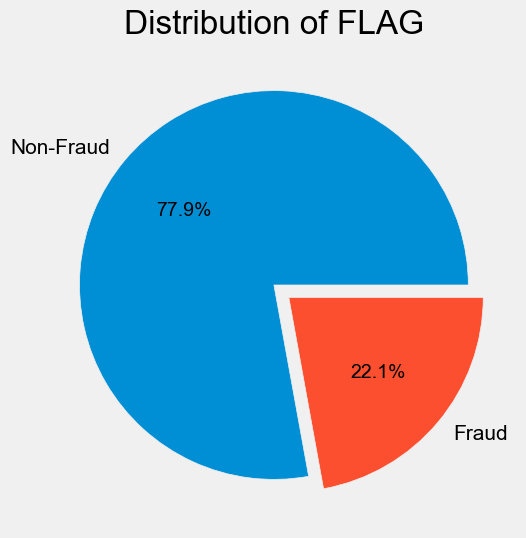

In [51]:
plt.figure(figsize = (17,6))
plt.title('Distribution of FLAG')
plt.pie(data['FLAG'].value_counts(),labels=['Non-Fraud','Fraud'],
        explode=[0,0.1],autopct='%1.1f%%')
plt.show();

In [52]:
temp = data["FLAG"].value_counts()
df = pd.DataFrame({'FLAG': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['FLAG'],y = df['values'],
    name="Credit Card Fraud FLAG - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Blue"),
    text=df['values']
)
sdata = [trace]
layout = dict(title = 'Fraud FLAG - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'FLAG', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=1000
         )
fig = dict(data=sdata, layout=layout)
iplot(fig, filename='FLAG')

In [53]:
correlation_matrix = data[columns].corr()

In [54]:
correlation_matrix.T

FLAG  Avg min between sent tnx  Avg min between received tnx  Time Diff between first and last (Mins)  Sent tnx  Received Tnx  Number of Created Contracts  Unique Received From Addresses  Unique Sent To Addresses  min value received  max value received  avg val received  min val sent  max val sent  avg val sent  min value sent to contract  max val sent to contract  avg value sent to contract  total transactions (including tnx to create contract  total Ether sent  total ether received  total ether sent contracts  total ether balance  Total ERC20 tnxs  ERC20 total Ether received  ERC20 total ether sent  ERC20 total Ether sent contract  ERC20 uniq sent addr  ERC20 uniq rec addr  ERC20 uniq sent addr.1  ERC20 uniq rec contract addr  ERC20 min val rec  ERC20 max val rec  ERC20 avg val rec  ERC20 min val sent  ERC20 max val sent  ERC20 avg val sent  ERC20 uniq sent token name  ERC20 uniq rec token name
FLAG                                                1.000000                 -0.029754                     -0.118533                                -0.269354 -0.078006     -0.079316                    -0.080630                       -0.031941                 -0.045584           -0.021641           -0.019259         -0.011881      0.006626     -0.022437     -0.063556                   -0.007213                 -0.007988                   -0.008883                                          -0.100289            -0.014993             -0.016900                   -0.007988            -0.003229         -0.034132                   -0.005711                0.018428                         0.008127             -0.025746            -0.027732               -0.011148                     -0.052473           0.004434          -0.005510           0.003132            0.019023            0.018770            0.018835                   -0.026290                  -0.052603
Avg min between sent tnx                           -0.029754                  1.000000                      0.060979                                 0.214722 -0.032289     -0.035735                    -0.086591                       -0.015912                 -0.017688           -0.014886           -0.007104         -0.004382     -0.000789     -0.005716      0.003597                   -0.000210                  0.001044                    0.000759                                          -0.043586            -0.006440             -0.007285                    0.001044            -0.001425         -0.011061                   -0.002339               -0.001916                        -0.004101             -0.008615            -0.000021               -0.011862                      0.047946           0.004998          -0.002260          -0.002829           -0.001511           -0.001841           -0.001792                    0.003310                   0.049548
Avg min between received tnx                       -0.118533                  0.060979                      1.000000                                 0.303897 -0.040419     -0.053478                     0.008647                       -0.029571                 -0.025747           -0.045753           -0.011575         -0.009313     -0.008761     -0.012176     -0.040011                   -0.003916                 -0.003230                   -0.003940                                          -0.060711            -0.009442             -0.010720                   -0.003230            -0.002149         -0.019177                   -0.003430               -0.003653                        -0.005813             -0.013811            -0.014694               -0.013750                     -0.011693          -0.007794          -0.003326          -0.005241           -0.003545           -0.003568           -0.003521                   -0.016831                  -0.011684
Time Diff between first and last (Mins)            -0.269354                  0.214722                      0.303897                                 1.000000  0.154480      0.148376           

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [56]:
plt.figure(figsize = (20,20))
plt.title(' crypto fraud Analytics And Detection')
corr = data.iloc[:, :-2].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds", annot=False, annot_kws={"fontsize": 12})
plt.show();

In [57]:
numeric_columns = data.columns.tolist()[1:-2]

In [58]:
threshold=0.95
removed_columns = []
for col in numeric_columns:
    if col != 'FLAG':
        corr, p_value = stats.pointbiserialr(data[col], data['FLAG'])
        if abs(corr) > threshold:
            removed_columns.append(col)
            data[col] = None

# Print the removed columns
print("Columns Removed:")
for col in removed_columns:
    print(col)

Columns Removed:


In [59]:
correlation_table = {}
for col in data.columns[1:-2]:
    if col != 'FLAG':
        corr, p_value = stats.pointbiserialr(data[col], data['FLAG'])
        correlation_table[col] = corr

# Convert the correlation table to a DataFrame
correlation_df = pd.DataFrame(correlation_table, index=['Point-Biserial Correlation'])

# Print the correlation table
correlation_df.T

Point-Biserial Correlation
Avg min between sent tnx                                             -0.029754
Avg min between received tnx                                         -0.118533
Time Diff between first and last (Mins)                              -0.269354
Sent tnx                                                             -0.078006
Received Tnx                                                         -0.079316
Number of Created Contracts                                          -0.080630
Unique Received From Addresses                                       -0.031941
Unique Sent To Addresses                                             -0.045584
min value received                                                   -0.021641
max value received                                                   -0.019259
avg val received                                                     -0.011881
min val sent                                                          0.006626
max val sent                                                         -0.022437
avg val sent                                                         -0.063556
min value sent to contract                                           -0.007213
max val sent to contract                                             -0.007988
avg value sent to contract                                           -0.008883
total transactions (including tnx to create con...                   -0.100289
total Ether sent                                                     -0.014993
total ether received                                                 -0.016900
total ether sent contracts                                           -0.007988
total ether balance                                                  -0.003229
Total ERC20 tnxs                                                     -0.034132
ERC20 total Ether received                                           -0.005711
ERC20 total ether sent                                                0.018428
ERC20 total Ether sent contract                                       0.008127
ERC20 uniq sent addr                                                 -0.025746
ERC20 uniq rec addr                                                  -0.027732
ERC20 uniq sent addr.1                                               -0.011148
ERC20 uniq rec contract addr                                         -0.052473
ERC20 min val rec                                                     0.004434
ERC20 max val rec                                                    -0.005510
ERC20 avg val rec                                                     0.003132
ERC20 min val sent                                                    0.019023
ERC20 max val sent                                                    0.018770
ERC20 avg val sent                                                    0.018835
ERC20 uniq sent token name                                           -0.026290
ERC20 uniq rec token name                                            -0.052603

In [60]:
data['FLAG'] = data['FLAG'].astype('category')
var = data.columns.values[1:]
# Create subplots grid
fig, axes = plt.subplots(13, 3, figsize=(18, 30))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.suptitle("Distribution of Features", y=1.05, size=24, weight='bold')

colss=data.columns[1:-2].tolist()
colss.remove('Number of Created Contracts')
# Iterate over columns and plot boxplots
for i, column in enumerate(colss):
    row = i // 3
    col = i % 3
    ax = sns.boxplot(ax=axes[row, col], data=data, palette="PRGn", showfliers=False, hue='FLAG', y='FLAG', x=column)
    ax.set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show();

## Features density plot

<Figure size 1500x500 with 0 Axes>

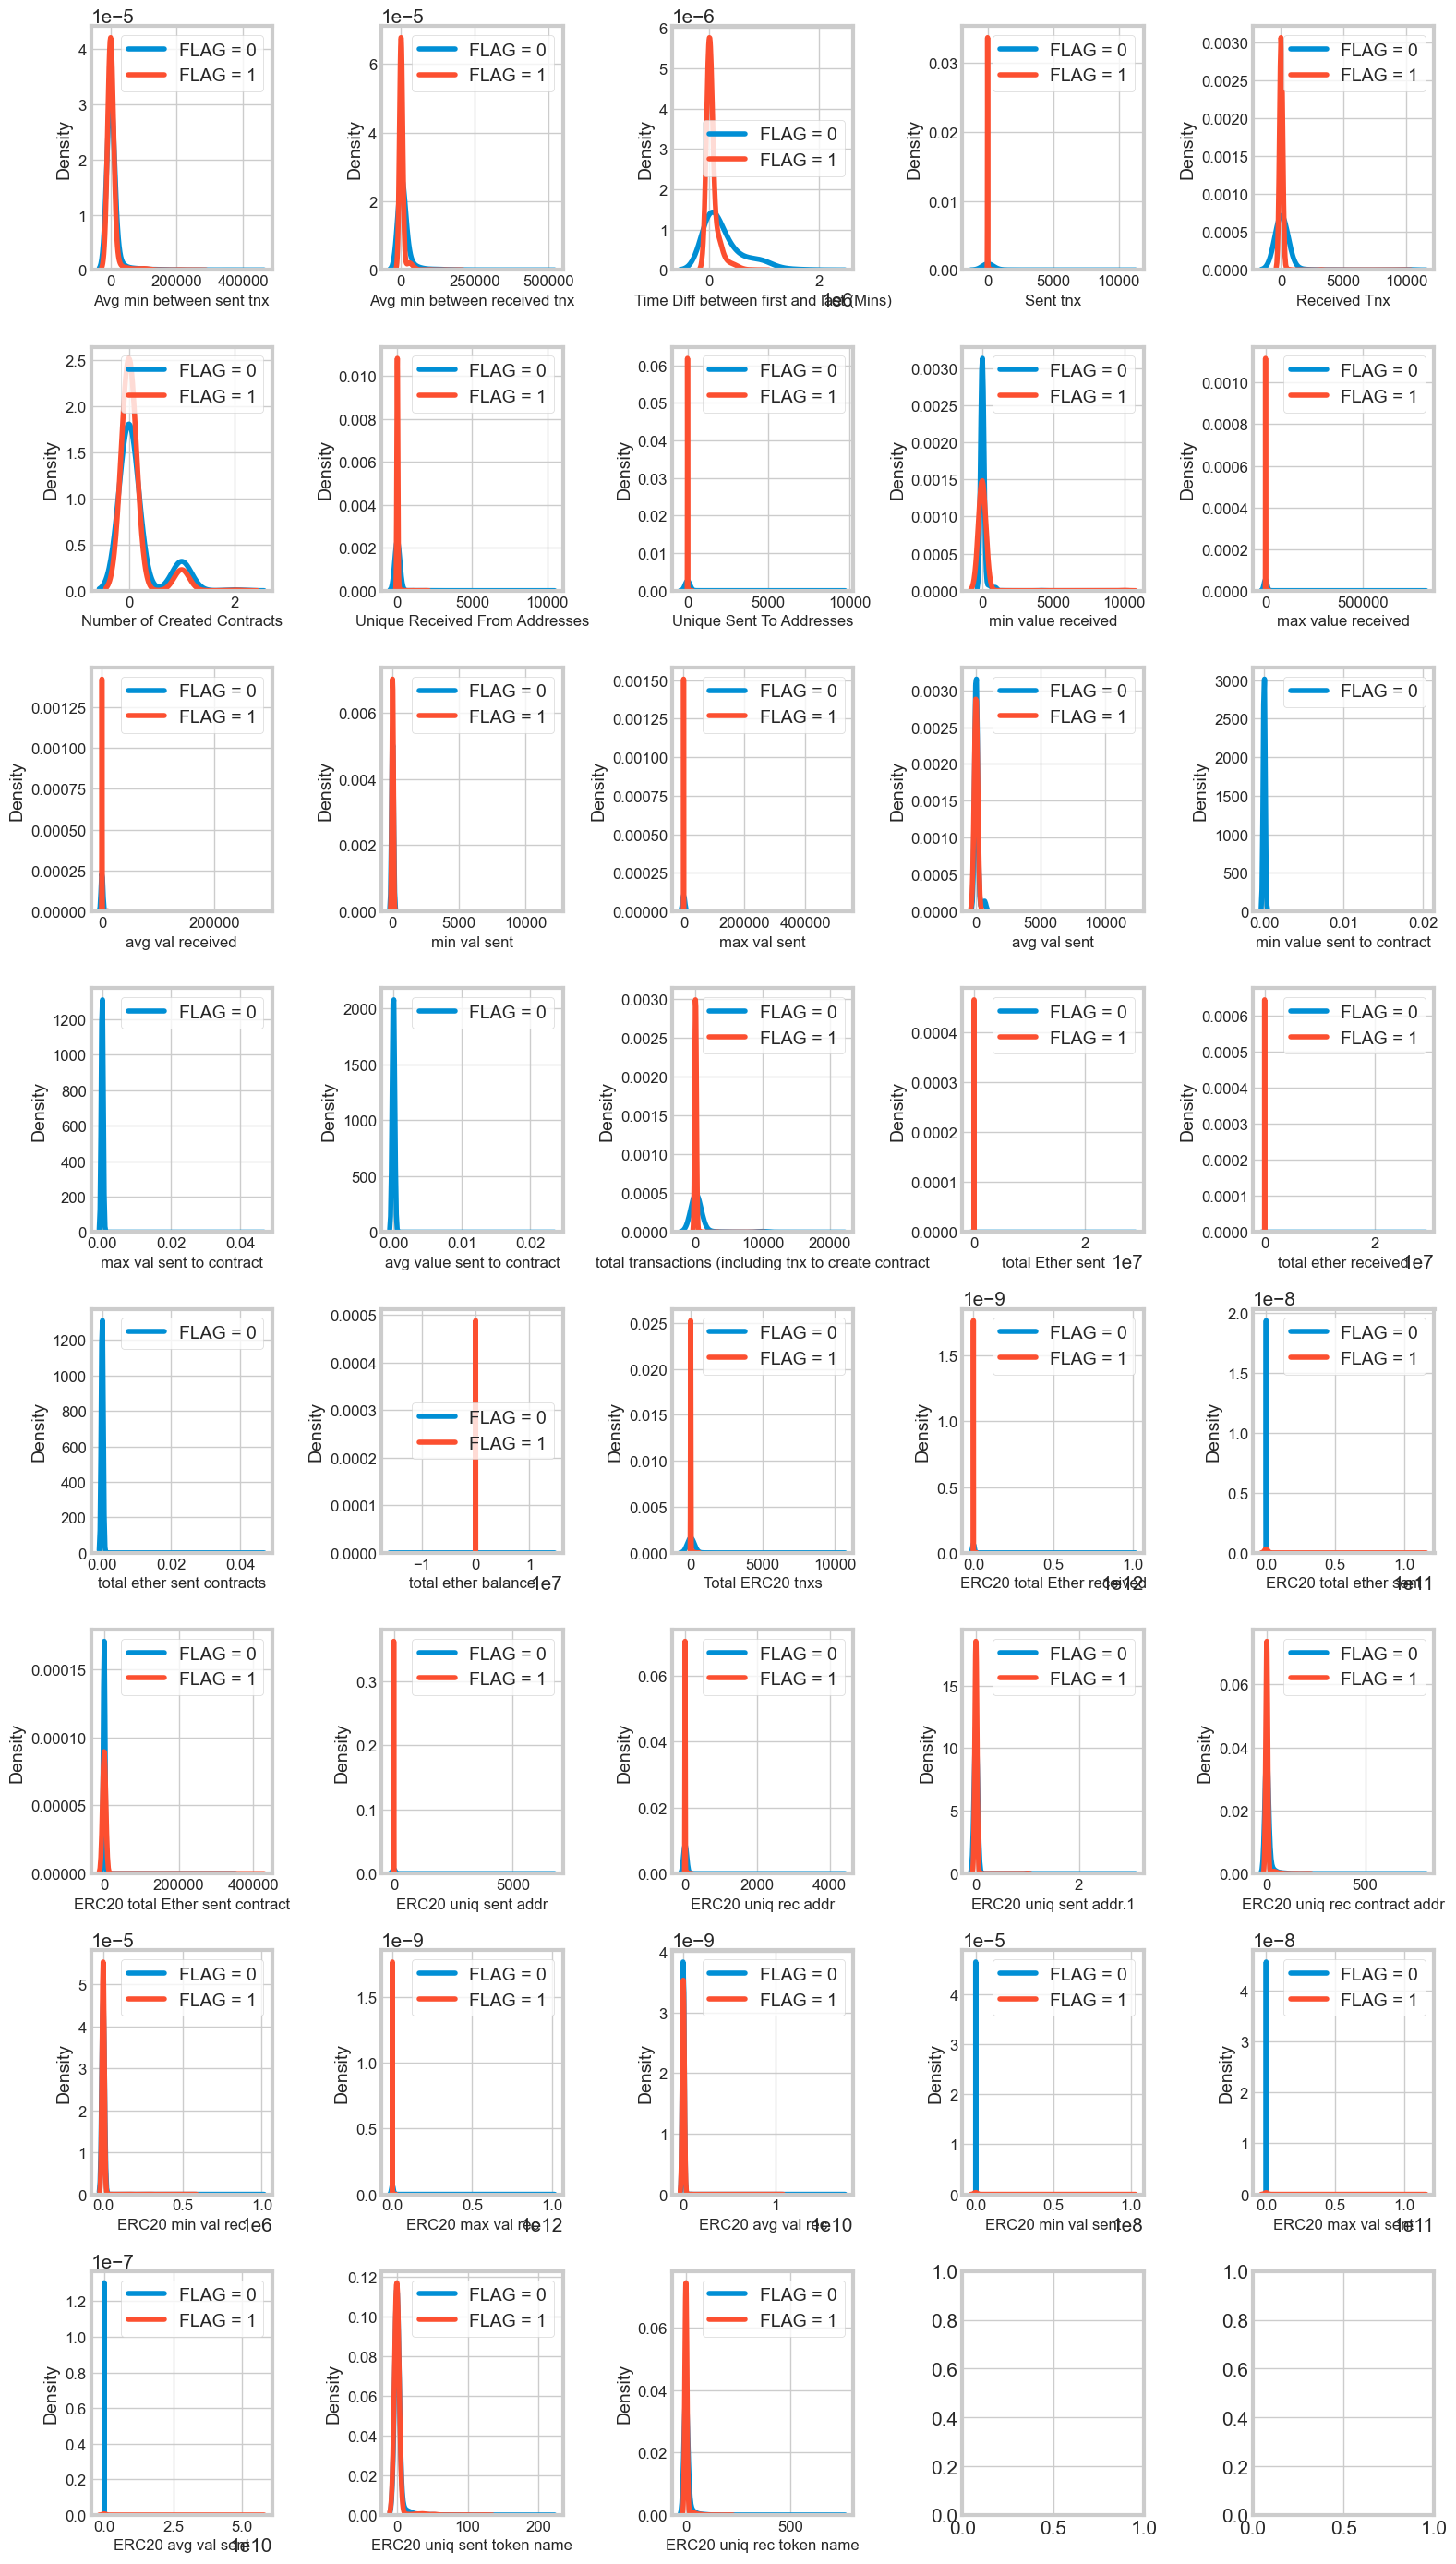

In [61]:
var = data.columns.values[1:-2]

i = 0
t0 = data.loc[data['FLAG'] == 0]
t1 = data.loc[data['FLAG'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,5,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,5,i)
    sns.kdeplot(t0[feature], bw=0.5,label="FLAG = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="FLAG = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend()
    #plt.xscale('log')
plt.tight_layout()  
plt.show();

In [62]:
data['Number of Created Contracts']=data['Number of Created Contracts'].astype('category')

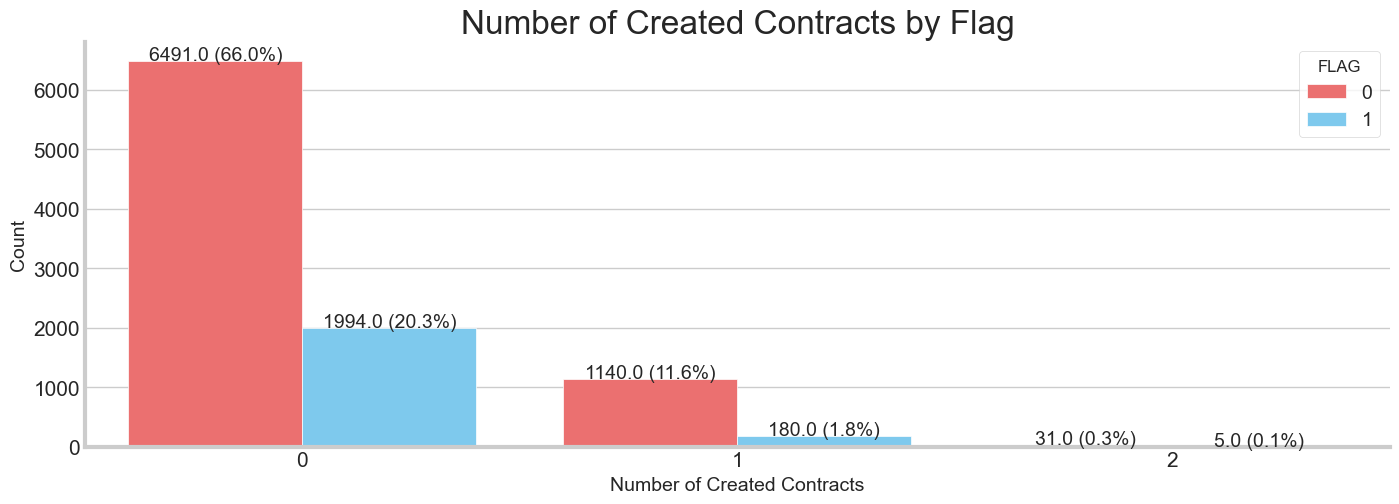

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette for the plot
colors = ['#FF5C5C', '#6CCFFF']

# Create the countplot
ax = sns.countplot(x='Number of Created Contracts', hue='FLAG', data=data, palette=colors)

# Add bar annotations
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{height} ({height/total:.1%})', ha='center')

# Add labels and title
plt.xlabel('Number of Created Contracts')
plt.ylabel('Count')
plt.title('Number of Created Contracts by Flag')

# Add a legend
plt.legend(title='FLAG')

# Customize the plot aesthetics
sns.despine()  # Remove the top and right spines

# Show the plot
plt.show()


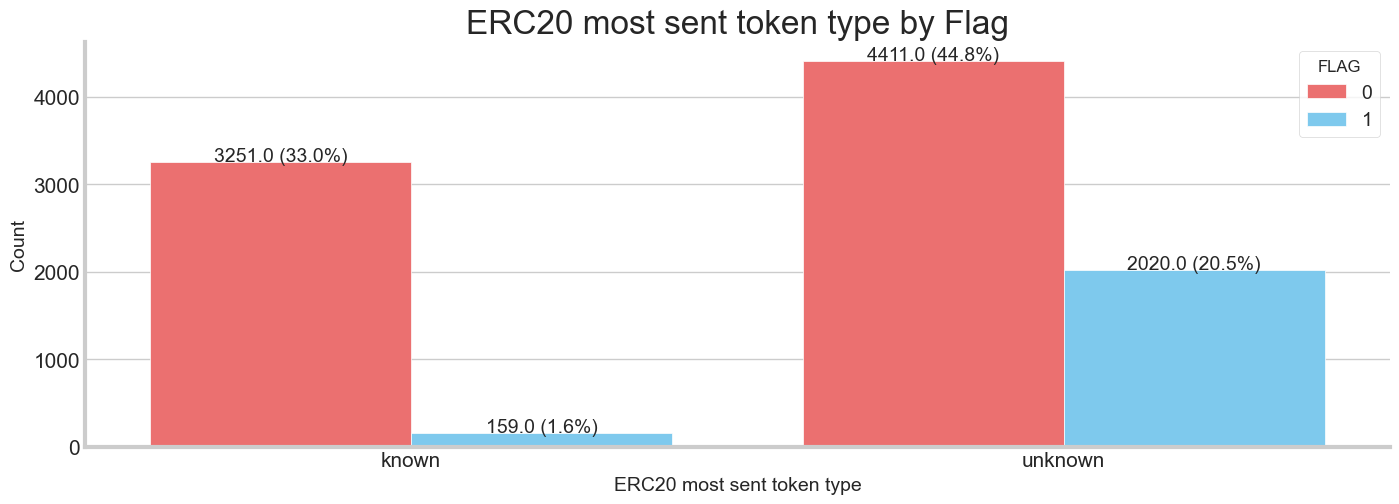

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette for the plot
colors = ['#FF5C5C', '#6CCFFF']

ax=sns.countplot(x='ERC20 most sent token type',hue='FLAG',data=data, palette=colors)

# Add bar annotations
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{height} ({height/total:.1%})', ha='center')

# Add labels and title
plt.xlabel('ERC20 most sent token type')
plt.ylabel('Count')
plt.title('ERC20 most sent token type by Flag')

# Add a legend
plt.legend(title='FLAG')

# Customize the plot aesthetics
sns.despine()  # Remove the top and right spines

# Show the plot
plt.show()


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette for the plot
colors = ['#FF5C5C', '#6CCFFF']

ax=sns.countplot(x='ERC20_most_rec_token_type',hue='FLAG',data=data, palette=colors)

# Add bar annotations
# total = len(data)
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{height} ({height/total:.1%})', ha='center')

# Add labels and title
plt.xlabel('ERC20_most_rec_token_type')
plt.ylabel('Count')
plt.title('ERC20_most_rec_token_type by Flag')
plt.xticks(rotation = 90)
# Add a legend
plt.legend(title='FLAG')

# Customize the plot aesthetics
sns.despine()  # Remove the top and right spines

# Show the plot
plt.show()


In [66]:
data['ERC20_most_rec_token_type'].value_counts()

unknown                               6108
OmiseGO                                873
Blockwell say NOTSAFU                  779
DATAcoin                               358
Livepeer Token                         207
EOS                                    161
XENON                                  145
Golem                                  126
GSENetwork                              80
Tronix                                  76
blockwell.ai KYC Casper Token           65
Promodl                                 52
VIU                                     50
INS Promo                               44
Bulleon Promo Token                     44
KickCoin                                43
StatusNetwork                           42
Free BOB Tokens - BobsRepair.com        38
BAT                                     36
ERC20                                   35
Reputation                              32
www.pnztrust.com                        32
BOX Token                               30
CANDY      

findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


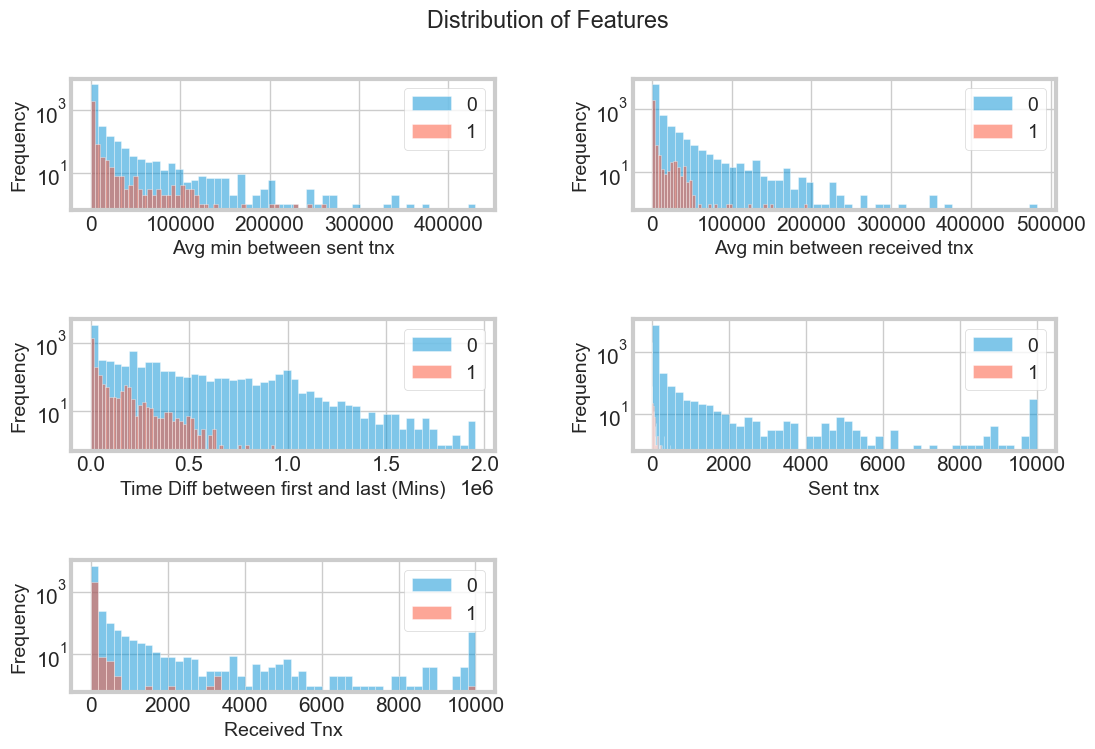

In [67]:
import matplotlib.pyplot as plt

# Define the columns to include in df_filtered
g_cols = ['Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)',
          'Sent tnx', 'Received Tnx', 'FLAG']

# Filter the DataFrame to include only the selected columns
df_filtered = data[g_cols]

# Set the number of subplots
n_subplots = len(g_cols) - 1
nrows = (n_subplots + 1) // 2  # Number of rows in the subplot grid
ncols = 2  # Number of columns in the subplot grid

# Create the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
fig.tight_layout(pad=4.0)  # Adjust the spacing between subplots

# Iterate over the columns and create histograms with hue
for i, column in enumerate(g_cols[:-1]):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    for flag_value in df_filtered['FLAG'].unique():
        ax.hist(df_filtered[df_filtered['FLAG'] == flag_value][column], label=str(flag_value), alpha=0.5, bins = 50)
    ax.set_yscale('log')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend()

# Hide unused subplots if the number of columns is odd
if n_subplots % 2 != 0:
    axes[-1, -1].axis('off')
plt.suptitle('Distribution of Features')
plt.show()


In [68]:
# Create subplots grid
fig, axes = plt.subplots(5, 1, figsize=(17, 20))
plt.subplots_adjust(hspace=0.6)
plt.suptitle("Distribution of Features with respect to Number of Contracts", y=1.015, size=32, weight='bold')

g_cols = ['Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)',
          'Sent tnx', 'Received Tnx']

# Iterate over columns and plot box plots
for i, column in enumerate(g_cols):
    ax = axes[i]
    sns.boxplot(data=data, x=column, y=data['Number of Created Contracts'], hue='FLAG', ax=ax, showfliers=False, palette='PRGn')
    ax.set_xlabel(column)
    ax.set_ylabel('Number of Contracts')
    ax.set_title(f"Distribution of Number of Contracts by {column}")
plt.tight_layout()
plt.show()


## One Hot Encoding

In [69]:
continuous_columns = ['Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx', 'min value received', 'max value received', 'avg val received', 'min val sent', 'max val sent', 'avg val sent', 'min value sent to contract', 'max val sent to contract', 'avg value sent to contract', 'total transactions (including tnx to create contract', 'total Ether sent', 'total ether received', 'total ether sent contracts', 'total ether balance', 'Total ERC20 tnxs', 'ERC20 total Ether received', 'ERC20 total ether sent', 'ERC20 total Ether sent contract', 'ERC20 min val rec', 'ERC20 max val rec', 'ERC20 avg val rec', 'ERC20 min val sent', 'ERC20 max val sent', 'ERC20 avg val sent']
dummy_data = pd.get_dummies(data, columns=['Number of Created Contracts', 'ERC20 most sent token type', 'ERC20_most_rec_token_type'])

for col in dummy_data.columns[38:].tolist():
    dummy_data[col] = dummy_data[col].astype(int) 
    
dummy_data.head()

FLAG  Avg min between sent tnx  Avg min between received tnx  Time Diff between first and last (Mins)  Sent tnx  Received Tnx  Unique Received From Addresses  Unique Sent To Addresses  min value received  max value received  avg val received  min val sent  max val sent  avg val sent  min value sent to contract  max val sent to contract  avg value sent to contract  total transactions (including tnx to create contract  total Ether sent  total ether received  total ether sent contracts  total ether balance  Total ERC20 tnxs  ERC20 total Ether received  ERC20 total ether sent  ERC20 total Ether sent contract  ERC20 uniq sent addr  ERC20 uniq rec addr  ERC20 uniq sent addr.1  ERC20 uniq rec contract addr  ERC20 min val rec  ERC20 max val rec  ERC20 avg val rec  ERC20 min val sent  ERC20 max val sent  ERC20 avg val sent  ERC20 uniq sent token name  ERC20 uniq rec token name  Number of Created Contracts_0  Number of Created Contracts_1  Number of Created Contracts_2  \
0    0                    844.26                       1093.71                                704785.63       721            89                              40                       118            0.000000           45.806785          6.589513          0.00     31.220000      1.200681                         0.0                       0.0                         0.0                                                810           865.691093            586.466675                         0.0          -279.224419             265.0                3.558854e+07            3.560317e+07                              0.0                  30.0                 54.0                     0.0                          58.0                0.0       1.500000e+07      265586.147600            0.000000        1.683100e+07       271779.920000                        39.0                       57.0                              1                              0                              0   
1    0                  12709.07                       2958.44                               1218216.73        94             8                               5                        14            0.000000            2.613269          0.385685          0.00      1.800000      0.032844                         0.0                       0.0                         0.0                                                102             3.087297              3.085478                         0.0            -0.001819               8.0                4.034283e+02            2.260809e+00                              0.0                   1.0                  5.0                     0.0                           7.0                0.0       3.650000e+02          57.632615            2.260809        2.260809e+00            2.260809                         1.0                        7.0                              1                              0                              0   
2    0                 246194.54                       2434.02                                516729.30         2            10                              10                         2            0.113119            1.165453          0.358906          0.05      3.538616      1.794308                         0.0                       0.0                         0.0                                                 12             3.588616              3.589057                         0.0             0.000441               8.0                5.215121e+02            0.000000e+00                              0.0                   0.0                  7.0                     0.0                           8.0                0.0       4.428198e+02          65.189009            0.000000        0.000000e+00            0.000000                         0.0                        8.0                              1                              0                              0   
3    0                  10219.60                      15785.09                        

# Train Test Split

In [70]:
X = dummy_data.drop(['FLAG'], axis=1)  
y = dummy_data['FLAG']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (7872, 87) (7872,)
Testing set shape: (1969, 87) (1969,)


In [71]:
smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)

In [72]:
# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (12240, 87) (12240,)
Testing set shape: (1969, 87) (1969,)


<img src = 'https://scikit-learn.org/stable/_images/grid_search_workflow.png'>

### Using Cross Validation for simpler models and their Comparison

In [73]:
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score, f1_score, log_loss
sns.set(style='white', context='notebook', palette='deep')

In [85]:
# Modeling step Test differents algorithms 
# Machine Learning Algorithm (MLA) Selection and Initialization
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)
random_state = 2
classifiers = []

classifiers.append(GaussianNB())
classifiers.append(LogisticRegression())
classifiers.append(SGDClassifier(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = 'accuracy', cv = 10, verbose=True, n_jobs = -1))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out

In [86]:
model_names = ['Naive Bayes', 'Logistic Regression', 'Stochastic Gradient Descent', 
'Decision Tree','Random Forest', 'AdaBoost', 'Extra Trees', 'Gradient Boosting Machine']

In [87]:
cvResults = pd.DataFrame(cv_results)
cvResults.columns = ['Fold1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6', 'Fold 7', 'Fold 8', 'Fold 9', 'Fold 10']
cvResults['Model'] = model_names
cvResults = cvResults[['Model','Fold1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Fold 6', 'Fold 7', 'Fold 8', 'Fold 9', 'Fold 10']]
cvResults.to_csv('cvResults_baseline_models.csv', index = False)

In [88]:
cvResults

Model     Fold1    Fold 2    Fold 3    Fold 4    Fold 5    Fold 6    Fold 7    Fold 8    Fold 9   Fold 10
0                  Naive Bayes  0.496732  0.500000  0.500000  0.500000  0.500000  0.500817  0.495098  0.500817  0.499183  0.500000
1          Logistic Regression  0.553922  0.565359  0.503268  0.501634  0.563725  0.560458  0.568627  0.503268  0.557190  0.569444
2  Stochastic Gradient Descent  0.651961  0.688725  0.737745  0.656046  0.629902  0.755719  0.668301  0.558007  0.451797  0.535131
3                Decision Tree  0.978758  0.986928  0.986928  0.997549  0.994281  0.991013  0.994281  0.995098  0.995915  0.992647
4                Random Forest  0.985294  0.982026  0.989379  0.999183  0.999183  0.999183  0.999183  0.997549  0.998366  0.998366
5                     AdaBoost  0.980392  0.984477  0.987745  0.995915  0.995098  0.992647  0.995098  0.995915  0.997549  0.993464
6                  Extra Trees  0.984477  0.986928  0.990196  0.998366  0.999183  0.999183  0.999183  0.995098  0.998366  0.999183
7    Gradient Boosting Machine  0.983660  0.982843  0.988562  0.998366  0.999183  0.996732  0.998366  0.997549  0.998366  0.997549

In [89]:
cvResults.set_index('Model').plot(kind = 'barh', figsize = (17,7), title = "Comparison of Baseline Models - 10 Fold Cross Validation")
plt.show();

In [90]:
def annotate_boxplot(bpdict, annotate_params=None,
                     x_offset=0.05, x_loc=0,
                     text_offset_x=35,
                     text_offset_y=20):
    """Annotates a matplotlib boxplot with labels marking various centile levels.

    Parameters:
    - bpdict: The dict returned from the matplotlib `boxplot` function. If you're using pandas you can
    get this dict by setting `return_type='dict'` when calling `df.boxplot()`.
    - annotate_params: Extra parameters for the plt.annotate function. The default setting uses standard arrows
    and offsets the text based on other parameters passed to the function
    - x_offset: The offset from the centre of the boxplot to place the heads of the arrows, in x axis
    units (normally just 0-n for n boxplots). Values between around -0.15 and 0.15 seem to work well
    - x_loc: The x axis location of the boxplot to annotate. Usually just the number of the boxplot, counting
    from the left and starting at zero.
    text_offset_x: The x offset from the arrow head location to place the associated text, in 'figure points' units
    text_offset_y: The y offset from the arrow head location to place the associated text, in 'figure points' units
    """
    if annotate_params is None:
        annotate_params = dict(xytext=(text_offset_x, text_offset_y), textcoords='offset points', arrowprops={'arrowstyle':'->'})

    plt.annotate('Median', (x_loc + 1 + x_offset, bpdict['medians'][x_loc].get_ydata()[0]), **annotate_params)
    plt.annotate('25%', (x_loc + 1 + x_offset, bpdict['boxes'][x_loc].get_ydata()[0]), **annotate_params)
    plt.annotate('75%', (x_loc + 1 + x_offset, bpdict['boxes'][x_loc].get_ydata()[2]), **annotate_params)
    plt.annotate('5%', (x_loc + 1 + x_offset, bpdict['caps'][x_loc*2].get_ydata()[0]), **annotate_params)
    plt.annotate('95%', (x_loc + 1 + x_offset, bpdict['caps'][(x_loc*2)+1].get_ydata()[0]), **annotate_params)

In [91]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [92]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":model_names})
cv_res

CrossValMeans  CrossValerrors                    Algorithm
0       0.499265        0.001769                  Naive Bayes
1       0.544690        0.027840          Logistic Regression
2       0.633333        0.089061  Stochastic Gradient Descent
3       0.991340        0.005385                Decision Tree
4       0.994771        0.006267                Random Forest
5       0.991830        0.005407                     AdaBoost
6       0.995016        0.005400                  Extra Trees
7       0.994118        0.006144    Gradient Boosting Machine

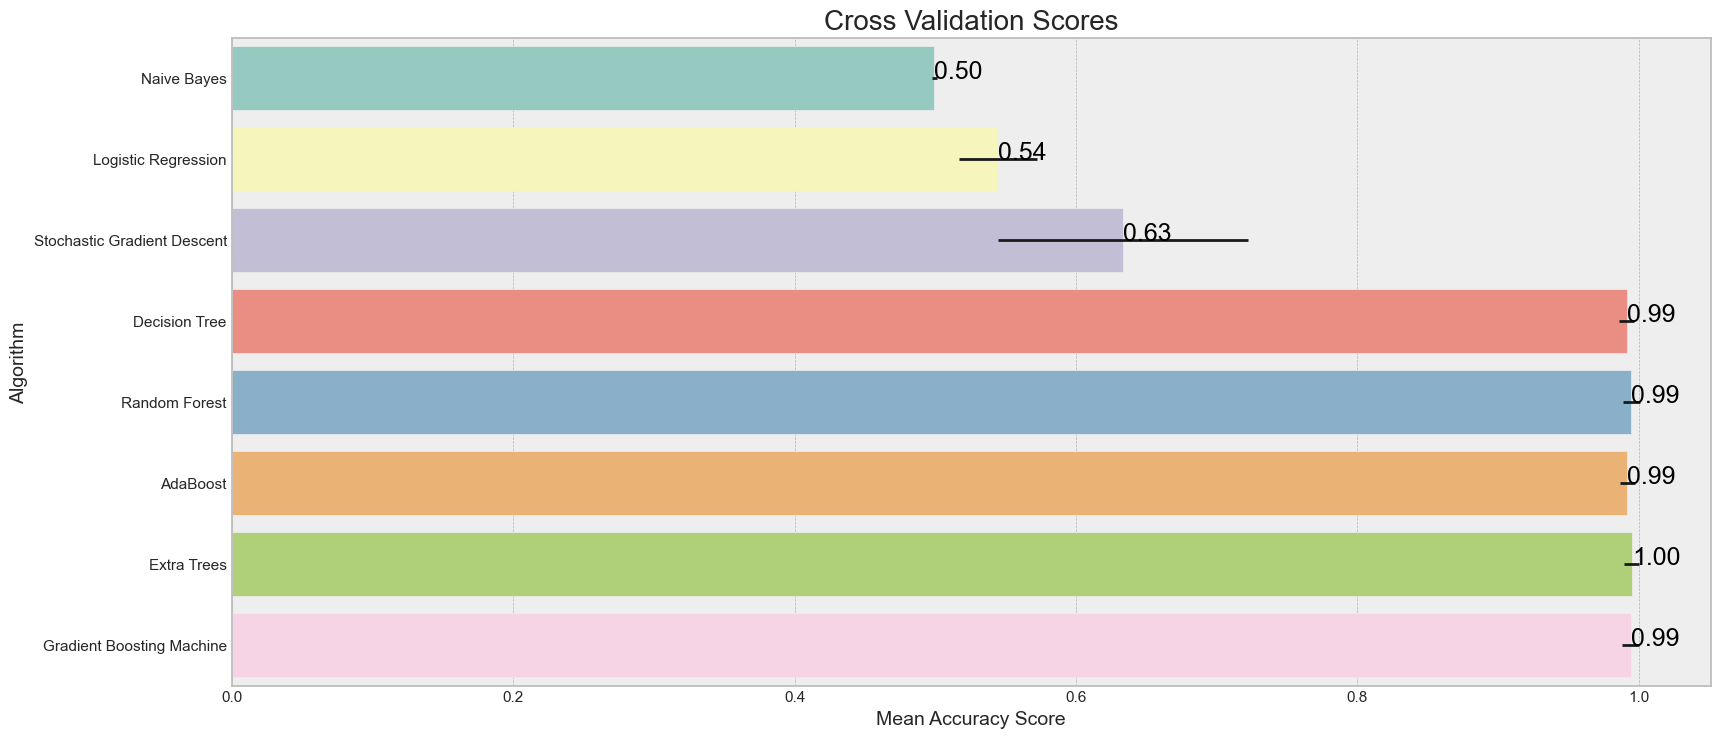

In [93]:
plt.style.use('bmh')
plt.figure(figsize=(17, 8))
g = sns.barplot(x="CrossValMeans", y="Algorithm", data=cv_res, palette="Set3", orient="h", **{'xerr': cv_std})
g.set_xlabel("Mean Accuracy Score", fontsize=14)  # Increase font size for x-axis label
g.set_ylabel("Algorithm", fontsize=14)  # Increase font size for y-axis label
g.set_title("Cross Validation Scores", fontsize=20)  # Increase font size for title

# Add validation scores to the bars
for i in range(len(cv_res)):
    score = cv_res.loc[i, 'CrossValMeans']
    g.text(x=score, y=i, s=f"{score:.2f}", color='black', ha="left", fontsize=18)  # Increase font size for text

plt.show()


### Exhaustive Grid Search

We configure different classifers for an exhaustive grid search using GridSearchCV. The apparent best classifier is then used to make predictions on the test set.

In [ ]:
from time import time

N_JOBS=24
rs = np.random.RandomState(2)

# y_train = Y_train
# y_test = Y_test


classifiers = [

    GridSearchCV(GaussianNB(),
                 param_grid={'var_smoothing': [1, 0.1, 0.01, 0.0001]},
                 refit=True, cv=10, n_jobs=N_JOBS),

    GridSearchCV(LogisticRegression(),
                 param_grid={'C': [100, 1.0, 0.1, 0.01]},
                 refit=True, cv=5, n_jobs=N_JOBS),

    GridSearchCV(SGDClassifier(),
                 param_grid={'penalty': ['l2', 'l1', 'elasticnet']},
                 refit=True, cv=5, n_jobs=N_JOBS),

    
    GridSearchCV(DecisionTreeClassifier(),
                 param_grid={'max_depth': [3, 5, 7, 10, 15, 20, 30]},
                 refit=True, cv=5, n_jobs=N_JOBS),
    
    GridSearchCV(RandomForestClassifier(),
                 param_grid={'max_depth': [3, 5, 7, 10, 15, 20, 30],
                             'n_estimators': [200],
                             'min_samples_split': [1 , 2,  5, 10],
                             'min_samples_leaf': [1, 2, 3, 5,  10]},
                 refit=True, cv=5, n_jobs=N_JOBS),

    GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=15), n_estimators=100),
                 param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.5, 1],
                             'algorithm': ['SAMME', 'SAMME.R']},
                 refit=True, cv=5, n_jobs=N_JOBS),

    GridSearchCV(ExtraTreesClassifier(),
                 param_grid={'criterion': ['entropy', 'gini'],
                             'min_samples_split': [1 , 2,  5, 10],
                             'min_samples_leaf': [1, 2, 3, 5,  10]},
                 refit=True, cv=5, n_jobs=N_JOBS),

    GridSearchCV(GradientBoostingClassifier(),
                 param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.5, 1],
                             'n_estimators': [200],
                             'max_depth': [5, 10, 20],
                             'min_samples_split': [1 , 2, 10],
                             'min_samples_leaf': [1, 2, 3, 5,  10]},
                 refit=True, cv=5, n_jobs=N_JOBS)


]

clf_trained_dict = {}
preds = {}

# Iterate over classifiers
for name, clf in zip(model_names, classifiers):
    print('='*(len(name)+24))
    print(f"Evaluating classifier: {name}")
    print('='*(len(name)+24))

    scaler = StandardScaler()  # Scale to mean = 0 and std_dev = 1
    X_train = scaler.fit_transform(X_train) # Fit to training data
    X_test = scaler.transform(X_test)   # Scale test data based on scaler fitted
    
    # Fit the classifer on the tranining set
    t0 = time()
    clf.fit(X_train, y_train)
    print("Training time:", round(time()-t0, 4), "s")

    # Make predictions on the training set
    t1 = time()
    predictions = clf.predict(X_train)
    print("Prediction time:", round(time()-t1, 4), "s")

    # Evaluate classifier
    print(f"The best parameters are {clf.best_params_} (score = {clf.best_score_:2f}) \n")
    print("Grid scores on training set:", "\n")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    
    # Save predictions and classifier
    preds[f'{name}'] = predictions
    clf_trained_dict[f'{name}'] = clf
    print('')

## Best Parameters

- "Naive Bayes" - {'var_smoothing': 0.01}
- "LogisticRegression" - {C = 100}
- "Stochastic Gradient Descent" - {penalty - l1}
- "DecisionTree" - {'max_depth': 15}
- "RandomForest" - {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
- "AdaBoost" -  {'algorithm': 'SAMME.R','learning_rate': 1}
- "ExtraTrees" - {'criterion': 'entropy', 'min_samples_leaf': '1', 'min_samples_split': 1}
- "GradientBoosting" - {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200, 'min_samples_leaf': 5, 'min_samples_split': 1}

# Comparison Table of ML based Models

Naive Bayes

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      1542
           1       0.22      1.00      0.36       427

    accuracy                           0.22      1969
   macro avg       0.61      0.50      0.18      1969
weighted avg       0.83      0.22      0.08      1969


 confussion matrix:
 [[   2 1540]
 [   0  427]]




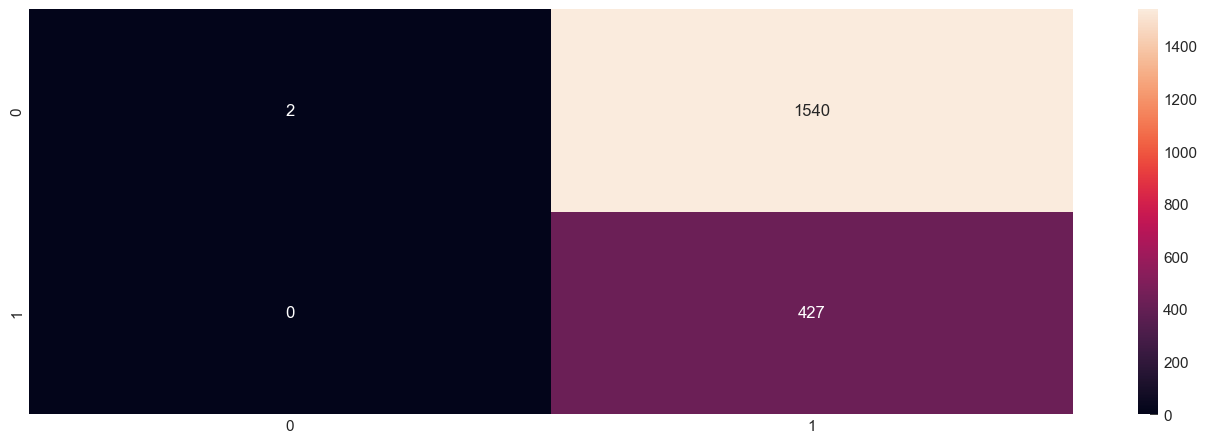

Logistic Regression

 clasification report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1542
           1       0.95      0.13      0.23       427

    accuracy                           0.81      1969
   macro avg       0.88      0.56      0.56      1969
weighted avg       0.84      0.81      0.75      1969


 confussion matrix:
 [[1539    3]
 [ 372   55]]




Stochastic Gradient Descent

 clasification report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1542
           1       0.34      0.37      0.36       427

    accuracy                           0.71      1969
   macro avg       0.58      0.59      0.58      1969
weighted avg       0.72      0.71      0.71      1969


 confussion matrix:
 [[1235  307]
 [ 268  159]]




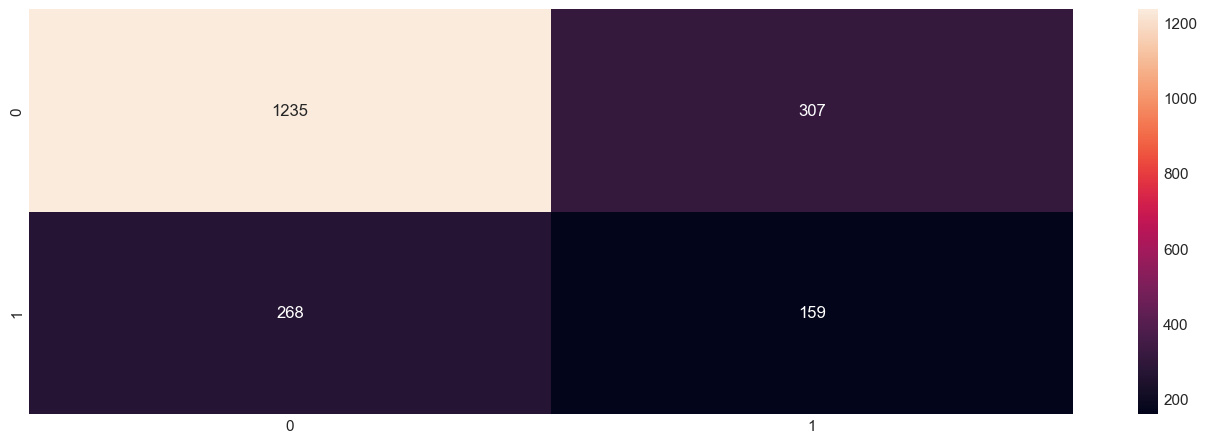

Decision Tree

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1542
           1       0.98      0.97      0.97       427

    accuracy                           0.99      1969
   macro avg       0.98      0.98      0.98      1969
weighted avg       0.99      0.99      0.99      1969


 confussion matrix:
 [[1532   10]
 [  12  415]]




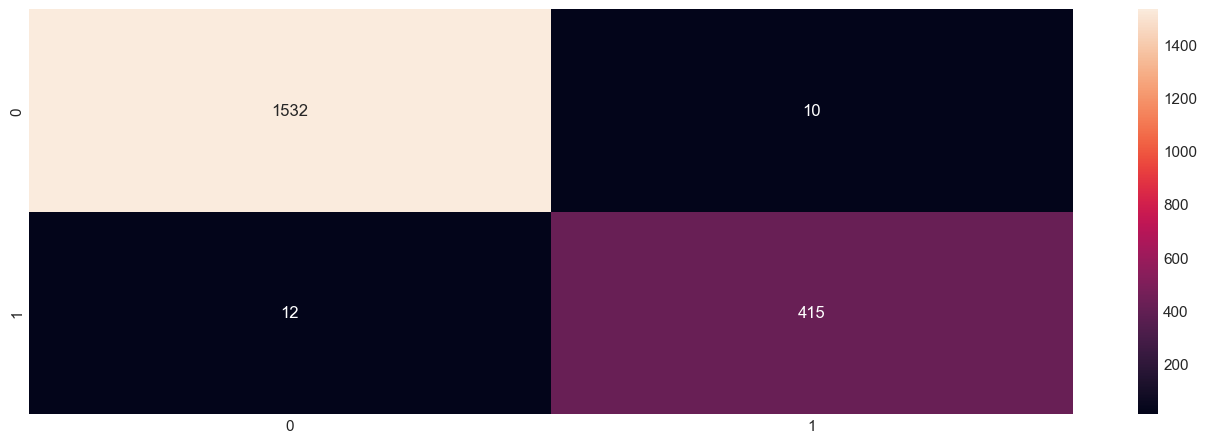

Random Forest

 clasification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1542
           1       1.00      0.97      0.98       427

    accuracy                           0.99      1969
   macro avg       0.99      0.98      0.99      1969
weighted avg       0.99      0.99      0.99      1969


 confussion matrix:
 [[1540    2]
 [  14  413]]




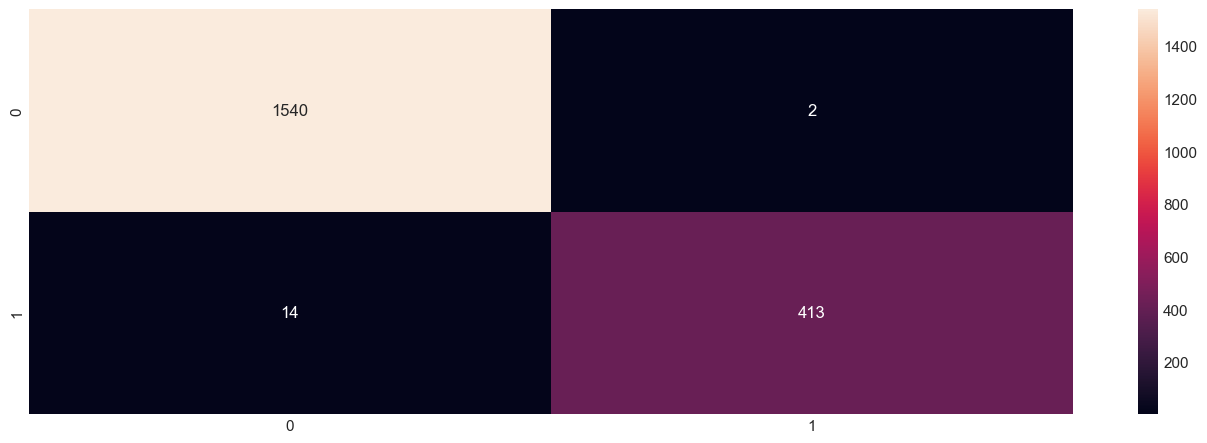

AdaBoost

 clasification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1542
           1       1.00      0.98      0.99       427

    accuracy                           0.99      1969
   macro avg       0.99      0.99      0.99      1969
weighted avg       0.99      0.99      0.99      1969


 confussion matrix:
 [[1540    2]
 [  10  417]]




Extra Trees

 clasification report:
               precision    recall  f1-score   support

           0       0.92      0.60      0.73      1542
           1       0.36      0.81      0.50       427

    accuracy                           0.65      1969
   macro avg       0.64      0.71      0.61      1969
weighted avg       0.80      0.65      0.68      1969


 confussion matrix:
 [[926 616]
 [ 80 347]]




Gradient Boosting Machine

 clasification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1542
           1       1.00      0.97      0.99       427

    accuracy                           0.99      1969
   macro avg       1.00      0.99      0.99      1969
weighted avg       0.99      0.99      0.99      1969


 confussion matrix:
 [[1542    0]
 [  11  416]]




In [94]:
from sklearn import metrics
train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1 = []
specificity = [] 
loss_log = [] 
roc= []
cohen_kappa = []
mcc = []

random_state = 2

models = ['Naive Bayes',
 'Logistic Regression',
 'Stochastic Gradient Descent',
 'Decision Tree',
 'Random Forest',
 'AdaBoost',
 'Extra Trees',
 'Gradient Boosting Machine'] 

classifiers = []     


classifiers.append(GaussianNB(var_smoothing=0.01))
classifiers.append(LogisticRegression(C = 100))
classifiers.append(SGDClassifier(random_state=random_state, penalty = 'l1'))
classifiers.append(DecisionTreeClassifier(random_state=random_state, max_depth=15))
classifiers.append(RandomForestClassifier(random_state=random_state, max_depth = 30, min_samples_leaf =  1, min_samples_split = 2 ,n_estimators = 200))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state, max_depth = 10),random_state=random_state,algorithm='SAMME.R',learning_rate=1))
classifiers.append(ExtraTreesClassifier(random_state=random_state, criterion =  'entropy', min_samples_leaf = 1, min_samples_split = 1.0))
classifiers.append(GradientBoostingClassifier(random_state=random_state, learning_rate = 0.1, max_depth =  20, min_samples_leaf= 5, min_samples_split= 10, n_estimators =  200))
                   
for classifier, model in zip(classifiers, models):
    print('='*len(model))
    print(model)
    print('='*len(model))
    classifier.fit(X_train, y_train)
    trainprediction = classifier.predict(X_train)
    prediction = classifier.predict(X_test)
    trainaccuracy = accuracy_score(y_train, trainprediction)
    testaccuracy = accuracy_score(y_test, prediction)
    train_accuracy.append(trainaccuracy)
    test_accuracy.append(testaccuracy)
    precision.append(precision_score(y_test, prediction))
    recall.append(recall_score(y_test, prediction))
    f1.append(f1_score(y_test, prediction))
    print('\n clasification report:\n', classification_report(y_test,prediction))
    print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
    print('\n')
    CM = confusion_matrix(y_test, prediction)
    sns.heatmap(CM, annot=True, fmt='d')
    plt.show()

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    Specificity = TN/(TN+FP)
    specificity.append(Specificity)

    Loss_log = metrics.log_loss(y_test, prediction)
    loss_log.append(Loss_log)

    ROC=metrics.roc_auc_score(y_test, prediction)
    roc.append(ROC)

    Cohen_Kappa = metrics.cohen_kappa_score(y_test, prediction)
    cohen_kappa.append(Cohen_Kappa)

    MCC = metrics.matthews_corrcoef(y_test, prediction)
    mcc.append(MCC)

In [95]:
scoreDF = pd.DataFrame({'Model' : models})
scoreDF['Train Accuracy'] = train_accuracy
scoreDF['Test Accuracy'] = test_accuracy
scoreDF['Precision'] =  precision
scoreDF['Recall'] =  recall
scoreDF['F1 Score'] = f1
scoreDF['Specificity'] = specificity
scoreDF['Matthew Correlation Coefficient'] = mcc
scoreDF['Cohen Kappa'] = cohen_kappa
scoreDF['ROC Score'] = roc
scoreDF['Loss Log'] = loss_log

scoreDF.set_index("Model")

Train Accuracy  Test Accuracy  Precision    Recall  F1 Score  Specificity  Matthew Correlation Coefficient  Cohen Kappa  ROC Score   Loss Log
Model                                                                                                                                                                     
Naive Bayes                        0.501307       0.217877   0.217082  1.000000  0.356725     0.001297                         0.016780     0.000563   0.500649  28.190567
Logistic Regression                0.563889       0.809548   0.948276  0.128806  0.226804     0.998054                         0.309198     0.184506   0.563430   6.864586
Stochastic Gradient Descent        0.536111       0.707974   0.341202  0.372365  0.356103     0.800908                         0.168002     0.167734   0.586637  10.525699
Decision Tree                      0.999837       0.988827   0.976471  0.971897  0.974178     0.993515                         0.967054     0.967049   0.982706   0.402722
Random Forest                      1.000000       0.991874   0.995181  0.967213  0.980998     0.998703                         0.975991     0.975831   0.982958   0.292889
AdaBoost                           1.000000       0.993906   0.995227  0.976581  0.985816     0.998703                         0.982006     0.981935   0.987642   0.219667
Extra Trees                        0.730556       0.646521   0.360332  0.812646  0.499281     0.600519                         0.340618     0.284190   0.706583  12.740672
Gradient Boosting Machine          1.000000       0.994413   1.000000  0.974239  0.986951     1.000000                         0.983534     0.983398   0.987119   0.201361

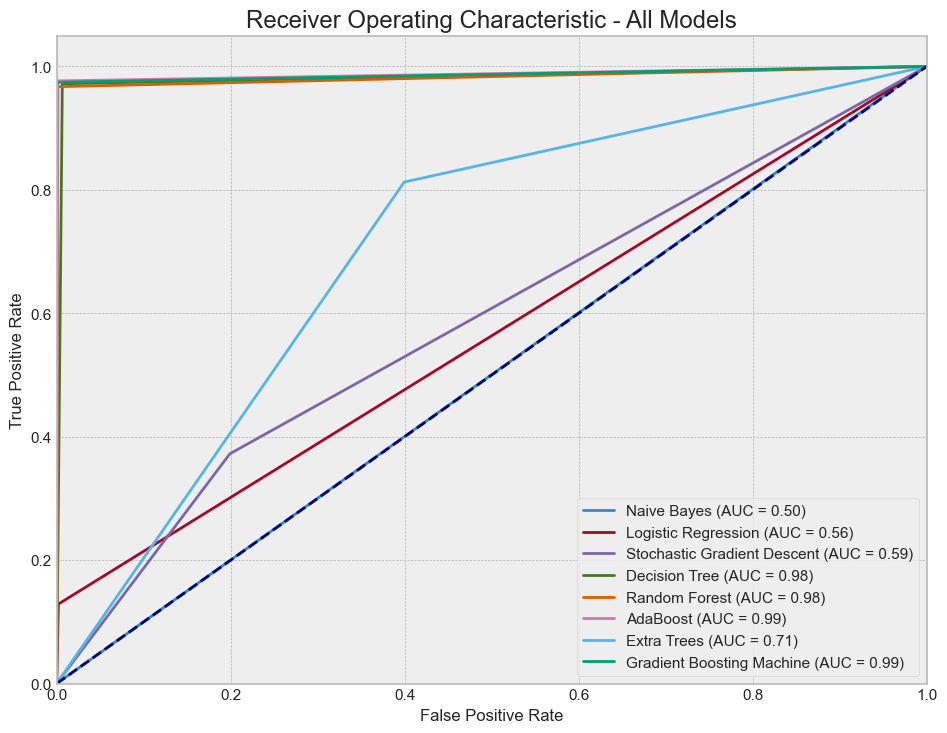

In [96]:
plt.figure(figsize=(10, 8))

for classifier, model in zip(classifiers, models):
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    
    fpr, tpr, _ = metrics.roc_curve(y_test, prediction)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=model + ' (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - All Models')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(10, 8))

for classifier, model in zip(classifiers, models):
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    
    precision, recall, _ = metrics.precision_recall_curve(y_test, prediction)
    average_precision = metrics.average_precision_score(y_test, prediction)
    plt.plot(recall, precision, lw=2, label=model + ' (Avg Precision = %0.2f)' % average_precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve - All Models')
plt.legend(loc="lower right")
plt.show()

In [97]:
scoreDF.to_csv('model_comparision-v5.csv')

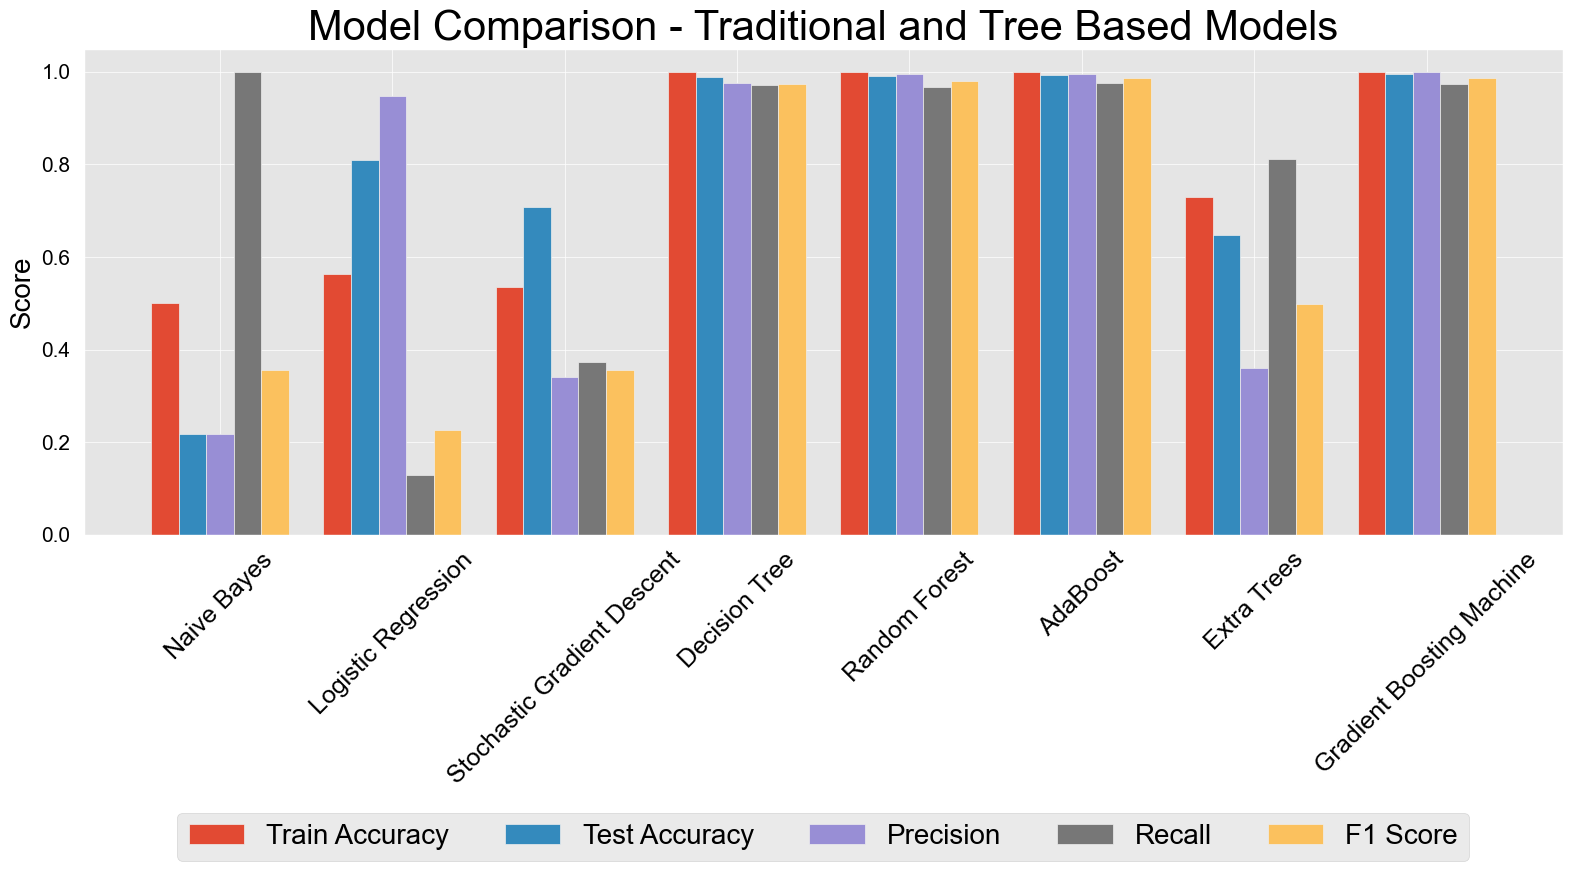

In [98]:
plt.style.use('ggplot')
models = ['Naive Bayes',
 'Logistic Regression',
 'Stochastic Gradient Descent',
 'Decision Tree',
 'Random Forest',
 'AdaBoost',
 'Extra Trees',
 'Gradient Boosting Machine']
params = {'legend.fontsize': '14',
          'figure.figsize': (15, 5),
         'axes.labelsize': '16',
         'axes.titlesize':'24',
         'xtick.labelsize':'15',
         'ytick.labelsize':'15'}
plt.rcParams.update(params)
plt.rcParams['text.color'] = '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['axes.labelcolor'] = '#000000'


def subcategorybar(X, vals, width=0.8):
    cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall','F1 Score']
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge", label = cols[i])   
        
        
    plt.xticks(_X, X)
    
plt.figure(figsize = (17,6))
subcategorybar(models, [scoreDF['Train Accuracy'], scoreDF['Test Accuracy'], scoreDF['Precision'], scoreDF['Recall'], scoreDF['F1 Score']])
cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall','F1 Score']
plt.xticks(rotation = 45, fontsize = 18)
plt.ylabel('Score', fontsize = 20)
plt.title('Model Comparison - Traditional and Tree Based Models', fontsize = 30)
plt.legend(bbox_to_anchor =(0.5,-0.7), loc='lower center', ncol = 5, fontsize = 20)
#plt.legend(cols)
plt.show();

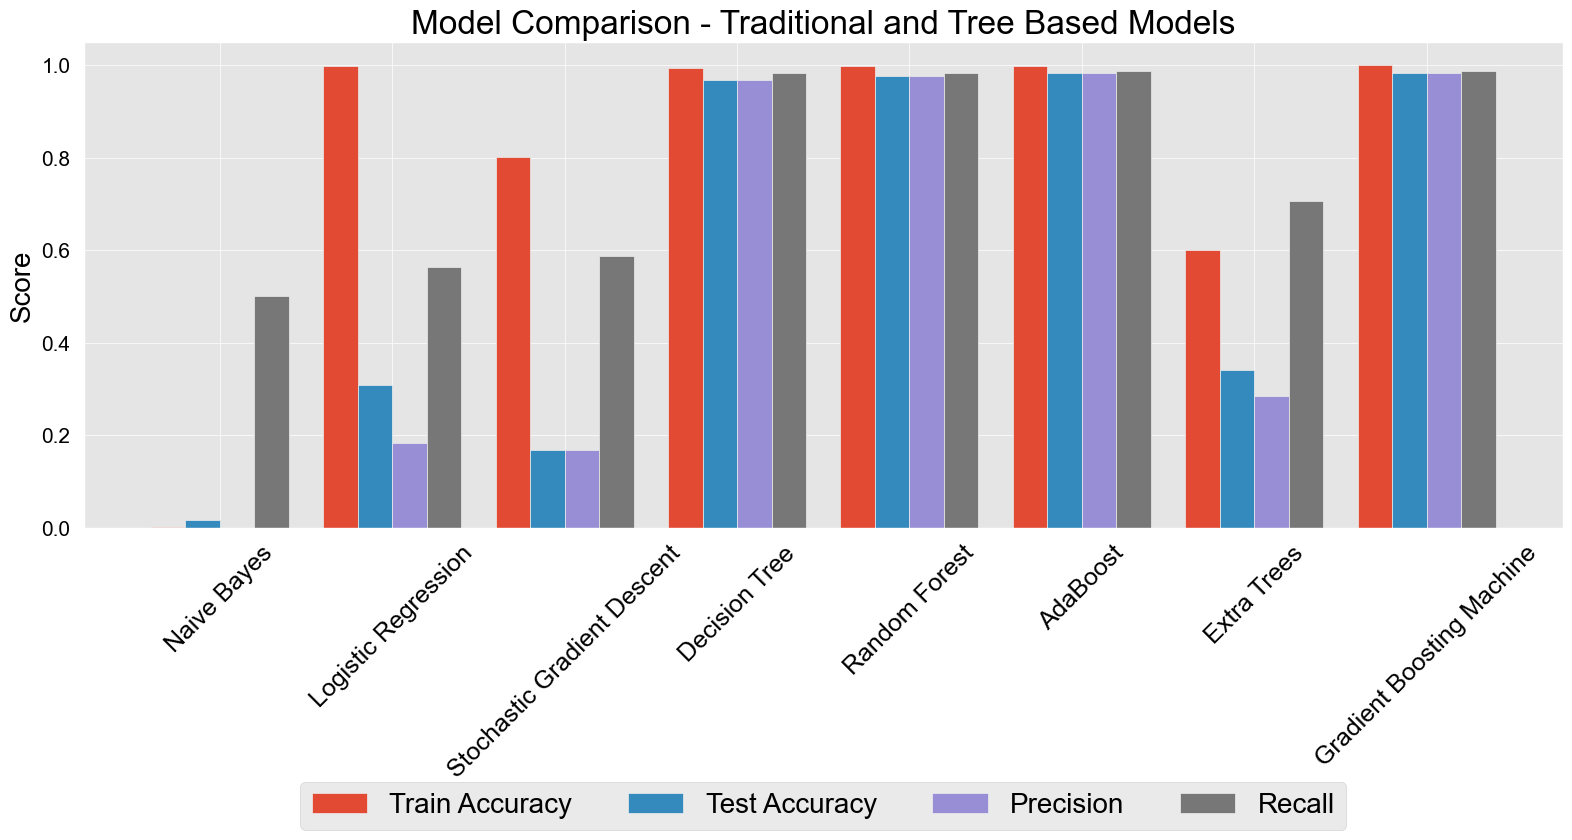

In [99]:
plt.figure(figsize = (17,6))
subcategorybar(models, [scoreDF['Specificity'], scoreDF['Matthew Correlation Coefficient'], scoreDF['Cohen Kappa'], scoreDF['ROC Score']])
cols = ['Specificity', 'Matthew Correlation Coefficient', 'Cohen Kappa', 'ROC Score']
plt.xticks(rotation = 45, fontsize = 18)
plt.ylabel('Score', fontsize = 20)
plt.title('Model Comparison - Traditional and Tree Based Models')
plt.legend(bbox_to_anchor =(0.5,-0.65), loc='lower center', ncol = 5, fontsize = 20)
plt.show();

## Best Machine Learning Model - Gradient Boosting Machine with tuned Parameters

# Ensemble on Simple base Models

**Hard Voting** - Predict the class with the largest sum of votes from models


**Soft Voting** - Predict the class with the largest summed probability from models.

### Simple Averaging

In [101]:
random_state = 123

DT = DecisionTreeClassifier(random_state=random_state)
RC = RandomForestClassifier(random_state=random_state)
NB = GaussianNB()
SVM = SVC(random_state=random_state)
KNN = KNeighborsClassifier(n_jobs=-1)

classifiers = []
classifiers.append(RandomForestClassifier(random_state=random_state, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state, max_depth=10), random_state=random_state, algorithm='SAMME.R', learning_rate=1))
classifiers.append(GradientBoostingClassifier(random_state=random_state, learning_rate=0.1, max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=200))

DT.fit(X_train, y_train)
RC.fit(X_train, y_train)
NB.fit(X_train, y_train)
SVM.fit(X_train, y_train)
KNN.fit(X_train, y_train)

predictions = []
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    predictions.append(pred)

# Add the predictions from the ensemble of classifiers
ensemble_pred = np.zeros_like(predictions[0])  # Initialize the ensemble predictions

for pred in predictions:
    ensemble_pred += pred

ensemble_pred = ensemble_pred / len(classifiers)

In [103]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the ensemble classifiers on the training data
for classifier in classifiers:
    classifier.fit(X_train, y_train)

# Obtain predictions from each classifier on the test data
predictions = []
for classifier in classifiers:
    pred = classifier.predict(X_test)
    predictions.append(pred)

# Combine the predictions using averaging
ensemble_pred = np.round(np.mean(predictions, axis=0)).astype(int)

# Evaluate the ensemble predictions against the ground truth labels
accuracy = accuracy_score(y_test, ensemble_pred)
# Calculate ensemble predictions
averaged_preds = np.round((predictions[0] + predictions[1] + predictions[2]) / 3).astype(int)

# Calculate accuracy score
acc = accuracy_score(y_test, averaged_preds)
print('Accuracy Score:', np.round(acc, 3))

# Calculate classification report
print('\nClassification Report:')
print(classification_report(y_test, averaged_preds))

# Calculate confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, averaged_preds))


# Obtain predictions from each classifier on the test data
t_predictions = []
for classifier in classifiers:
    pred = classifier.predict(X_train)
    t_predictions.append(pred)

# Combine the predictions using averaging
train_pred = np.round(np.mean(t_predictions, axis=0)).astype(int)

# Evaluate the ensemble predictions against the ground truth labels
accuracy = accuracy_score(y_train, train_pred)

Accuracy Score: 0.993

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1542
           1       1.00      0.97      0.98       427

    accuracy                           0.99      1969
   macro avg       0.99      0.99      0.99      1969
weighted avg       0.99      0.99      0.99      1969


Confusion Matrix:
[[1540    2]
 [  12  415]]


In [107]:
test_accuracy = scoreDF['Test Accuracy'].values.tolist()
precision = scoreDF['Precision'].values.tolist()
recall = scoreDF['Recall'].values.tolist()
f1 = scoreDF['F1 Score'].values.tolist()
specificity = scoreDF['Specificity'].values.tolist()
mcc = scoreDF['Matthew Correlation Coefficient'].values.tolist()
cohen_kappa = scoreDF['Cohen Kappa'].values.tolist()
roc = scoreDF['ROC Score'].values.tolist()
loss_log = scoreDF['Loss Log'].values.tolist()

In [109]:
trainprediction = train_pred
prediction = averaged_preds
trainaccuracy = accuracy_score(y_train, trainprediction)
testaccuracy = accuracy_score(y_test, prediction)
train_accuracy.append(trainaccuracy)
test_accuracy.append(testaccuracy)
precision.append(precision_score(y_test, prediction))
recall.append(recall_score(y_test, prediction))
f1.append(f1_score(y_test, prediction))
CM = confusion_matrix(y_test, prediction)


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
Specificity = TN/(TN+FP)
specificity.append(Specificity)

Loss_log = metrics.log_loss(y_test, prediction)
loss_log.append(Loss_log)

ROC=metrics.roc_auc_score(y_test, prediction)
roc.append(ROC)

Cohen_Kappa = metrics.cohen_kappa_score(y_test, prediction)
cohen_kappa.append(Cohen_Kappa)

MCC = metrics.matthews_corrcoef(y_test, prediction)
mcc.append(MCC)

### Weighted Averaging

## Hard

In [110]:
ensemble = VotingClassifier(estimators=[(f'Classifier_{i}', classifier) for i, classifier in enumerate(classifiers)], voting='hard')

In [111]:
cross = cross_val_score(ensemble, X_train, y_train, cv=5, scoring='accuracy')
print('The cross validated score is', cross.mean())

The cross validated score is 0.9949346405228757


In [112]:
# Fit the ensemble model on the full training data
ensemble.fit(X_train, y_train)

# Calculate accuracy score for ensembled model on test data
accuracy = ensemble.score(X_test, y_test)
print('The Accuracy score for ensembled model on test data is:', accuracy)

# Perform cross-validated prediction
y_pred_ensemble = cross_val_predict(ensemble, X_test, y_test, cv=5)
# Perform cross-validated prediction
y_pred_ensemble_train = cross_val_predict(ensemble, X_train, y_train, cv=5)
# Calculate accuracy score, classification report, and confusion matrix
acc = accuracy_score(y_test, y_pred_ensemble)
print('Accuracy Score:', np.round(acc, 3))

print('Classification Report:')
print(classification_report(y_test, y_pred_ensemble))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_ensemble))

The Accuracy score for ensembled model on test data is: 0.9928897917724734
Accuracy Score: 0.987
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1542
           1       0.99      0.95      0.97       427

    accuracy                           0.99      1969
   macro avg       0.99      0.97      0.98      1969
weighted avg       0.99      0.99      0.99      1969

Confusion Matrix:
[[1539    3]
 [  22  405]]


In [113]:
# Perform cross-validated prediction
y_pred_ensemble_train = cross_val_predict(ensemble, X_train, y_train, cv=5)

In [114]:
trainprediction = y_pred_ensemble_train
prediction = y_pred_ensemble
trainaccuracy = accuracy_score(y_train, trainprediction)
testaccuracy = accuracy_score(y_test, prediction)
train_accuracy.append(trainaccuracy)
test_accuracy.append(testaccuracy)
precision.append(precision_score(y_test, prediction))
recall.append(recall_score(y_test, prediction))
f1.append(f1_score(y_test, prediction))
CM = confusion_matrix(y_test, prediction)


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
Specificity = TN/(TN+FP)
specificity.append(Specificity)

Loss_log = metrics.log_loss(y_test, prediction)
loss_log.append(Loss_log)

ROC=metrics.roc_auc_score(y_test, prediction)
roc.append(ROC)

Cohen_Kappa = metrics.cohen_kappa_score(y_test, prediction)
cohen_kappa.append(Cohen_Kappa)

MCC = metrics.matthews_corrcoef(y_test, prediction)
mcc.append(MCC)

## Soft

In [115]:
# Perform soft voting using VotingClassifier
ensemble = VotingClassifier(estimators=[(f'Classifier_{i}', classifier) for i, classifier in enumerate(classifiers)], voting='soft')

# Fit the ensemble model
ensemble.fit(X_train, y_train)

# Calculate cross-validated score
cross = cross_val_score(ensemble, X_train, y_train, cv=5, scoring='accuracy')
print('The cross-validated score is', np.round(cross.mean(), 3))

# Fit the ensemble model on the full training data
ensemble.fit(X_train, y_train)

# Calculate accuracy score for the ensemble model on test data
accuracy = ensemble.score(X_test, y_test)
print('The accuracy score for the ensemble model on test data is:', np.round(accuracy, 3))

# Perform cross-validated prediction
y_pred_ensemble = cross_val_predict(ensemble, X_test, y_test, cv=5)
y_train_pred_ensemble = cross_val_predict(ensemble, X_train, y_train, cv=5)

# Calculate accuracy score, classification report, and confusion matrix
acc = accuracy_score(y_test, y_pred_ensemble)
print('Accuracy Score:', np.round(acc, 3))

print('Classification Report:')
print(classification_report(y_test, y_pred_ensemble))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_ensemble))

The cross-validated score is 0.995
The accuracy score for the ensemble model on test data is: 0.994
Accuracy Score: 0.988
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1542
           1       0.99      0.95      0.97       427

    accuracy                           0.99      1969
   macro avg       0.99      0.97      0.98      1969
weighted avg       0.99      0.99      0.99      1969

Confusion Matrix:
[[1539    3]
 [  21  406]]


In [116]:
trainprediction = y_pred_ensemble_train
prediction = y_pred_ensemble
trainaccuracy = accuracy_score(y_train, trainprediction)
testaccuracy = accuracy_score(y_test, prediction)
train_accuracy.append(trainaccuracy)
test_accuracy.append(testaccuracy)
precision.append(precision_score(y_test, prediction))
recall.append(recall_score(y_test, prediction))
f1.append(f1_score(y_test, prediction))
CM = confusion_matrix(y_test, prediction)


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
Specificity = TN/(TN+FP)
specificity.append(Specificity)

Loss_log = metrics.log_loss(y_test, prediction)
loss_log.append(Loss_log)

ROC=metrics.roc_auc_score(y_test, prediction)
roc.append(ROC)

Cohen_Kappa = metrics.cohen_kappa_score(y_test, prediction)
cohen_kappa.append(Cohen_Kappa)

MCC = metrics.matthews_corrcoef(y_test, prediction)
mcc.append(MCC)

In [125]:
models = ['Naive Bayes', 'Logistic Regression', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest',
 'AdaBoost', 'Extra Trees', 'Gradient Boosting Machine', 'Model Averaging', 'Soft Voting', 'Hard Voting'] 

scoreDF = pd.DataFrame({'Model' : models})
scoreDF['Train Accuracy'] = train_accuracy
scoreDF['Test Accuracy'] = test_accuracy
scoreDF['Precision'] =  precision
scoreDF['Recall'] =  recall
scoreDF['F1 Score'] = f1
scoreDF['Specificity'] = specificity
scoreDF['Matthew Correlation Coefficient'] = mcc
scoreDF['Cohen Kappa'] = cohen_kappa
scoreDF['ROC Score'] = roc
scoreDF['Loss Log'] = loss_log

scoreDF.set_index("Model")

Train Accuracy  Test Accuracy  Precision    Recall  F1 Score  Specificity  Matthew Correlation Coefficient  Cohen Kappa  ROC Score   Loss Log
Model                                                                                                                                                                     
Naive Bayes                        0.501307       0.217877   0.217082  1.000000  0.356725     0.001297                         0.016780     0.000563   0.500649  28.190567
Logistic Regression                0.563889       0.809548   0.948276  0.128806  0.226804     0.998054                         0.309198     0.184506   0.563430   6.864586
Stochastic Gradient Descent        0.536111       0.707974   0.341202  0.372365  0.356103     0.800908                         0.168002     0.167734   0.586637  10.525699
Decision Tree                      0.999837       0.988827   0.976471  0.971897  0.974178     0.993515                         0.967054     0.967049   0.982706   0.402722
Random Forest                      1.000000       0.991874   0.995181  0.967213  0.980998     0.998703                         0.975991     0.975831   0.982958   0.292889
AdaBoost                           1.000000       0.993906   0.995227  0.976581  0.985816     0.998703                         0.982006     0.981935   0.987642   0.219667
Extra Trees                        0.730556       0.646521   0.360332  0.812646  0.499281     0.600519                         0.340618     0.284190   0.706583  12.740672
Gradient Boosting Machine          1.000000       0.994413   1.000000  0.974239  0.986951     1.000000                         0.983534     0.983398   0.987119   0.201361
Model Averaging                    1.000000       0.992890   0.995204  0.971897  0.983412     0.998703                         0.979000     0.978888   0.985300   0.256278
Soft Voting                        1.000000       0.987303   0.992647  0.948478  0.970060     0.998054                         0.962410     0.962008   0.973266   0.457639
Hard Voting                        0.994935       0.987811   0.992665  0.950820  0.971292     0.998054                         0.963920     0.963559   0.974437   0.439334

In [129]:
scoreDF.to_csv('model_comparision-v7.csv')

### ROC AUC Curve

In [76]:
random_state = 123

DT = DecisionTreeClassifier(random_state=random_state)
RC = RandomForestClassifier(random_state=random_state)
NB = GaussianNB()
SVM = SVC(probability=True,random_state=random_state,kernel = 'linear')
KNN = KNeighborsClassifier(n_jobs=-1)

classifiers = []
classifiers.append(RandomForestClassifier(random_state=random_state, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state, max_depth=10), random_state=random_state, algorithm='SAMME.R', learning_rate=1))
classifiers.append(GradientBoostingClassifier(random_state=random_state, learning_rate=0.1, max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=200))

probabilities = []
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    prob = classifier.predict_proba(X_test)[:, 1]  # Extract probabilities for the positive class
    probabilities.append(prob)

# Add the probabilities from the ensemble of classifiers
ensemble_prob = np.zeros_like(probabilities[0])  # Initialize the ensemble probabilities

for prob in probabilities:
    ensemble_prob += prob

ensemble_prob = ensemble_prob / len(classifiers)

hard_ensemble = VotingClassifier(estimators=[(f'Classifier_{i}', classifier) for i, classifier in enumerate(classifiers)], voting='hard')
soft_ensemble = VotingClassifier(estimators=[(f'Classifier_{i}', classifier) for i, classifier in enumerate(classifiers)], voting='soft')
hard_ensemble.fit(X_train, y_train)
soft_ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('Classifier_0',
                              RandomForestClassifier(max_depth=30,
                                                     n_estimators=200,
                                                     random_state=123)),
                             ('Classifier_1',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                                                  random_state=123),
                                                 learning_rate=1,
                                                 random_state=123)),
                             ('Classifier_2',
                              GradientBoostingClassifier(max_depth=20,
                                                         min_samples_leaf=5,
                                                         min_samples_split=10,
                                                         n_estimators=200,
                                                         random_state=123))],
                 voting='soft')

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
import xgboost as xgb

# Create the model instances
DT = DecisionTreeClassifier(random_state=random_state)
LR = LogisticRegression(random_state=random_state)
LDA = LinearDiscriminantAnalysis()
SGD = SGDClassifier(random_state=random_state)
RF = RandomForestClassifier(random_state=random_state, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
BG = BaggingClassifier(random_state=random_state)
XGB = xgb.XGBClassifier(random_state=random_state)
ADA = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=random_state, max_depth=10), random_state=random_state, algorithm='SAMME.R', learning_rate=1)
GBM = GradientBoostingClassifier(random_state=random_state, learning_rate=0.1, max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=200)
ET = ExtraTreesClassifier(random_state=random_state)

# Fit the models
DT.fit(X_train, y_train)
LR.fit(X_train, y_train)
LDA.fit(X_train, y_train)
SGD.fit(X_train, y_train)
RF.fit(X_train, y_train)
BG.fit(X_train, y_train)
XGB.fit(X_train, y_train)
ADA.fit(X_train, y_train)
GBM.fit(X_train, y_train)
ET.fit(X_train, y_train)

ExtraTreesClassifier(random_state=123)

In [82]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    
    if y_proba.ndim > 1 and y_proba.shape[1] > 1:
        fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])
        auc_score = roc_auc_score(y_true, y_proba[:, 1])
    else:
        fpr, tpr, _ = roc_curve(y_true, y_proba)
        auc_score = roc_auc_score(y_true, y_proba)
    
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw, label="%s (area=%.4f)" % (label, auc_score))

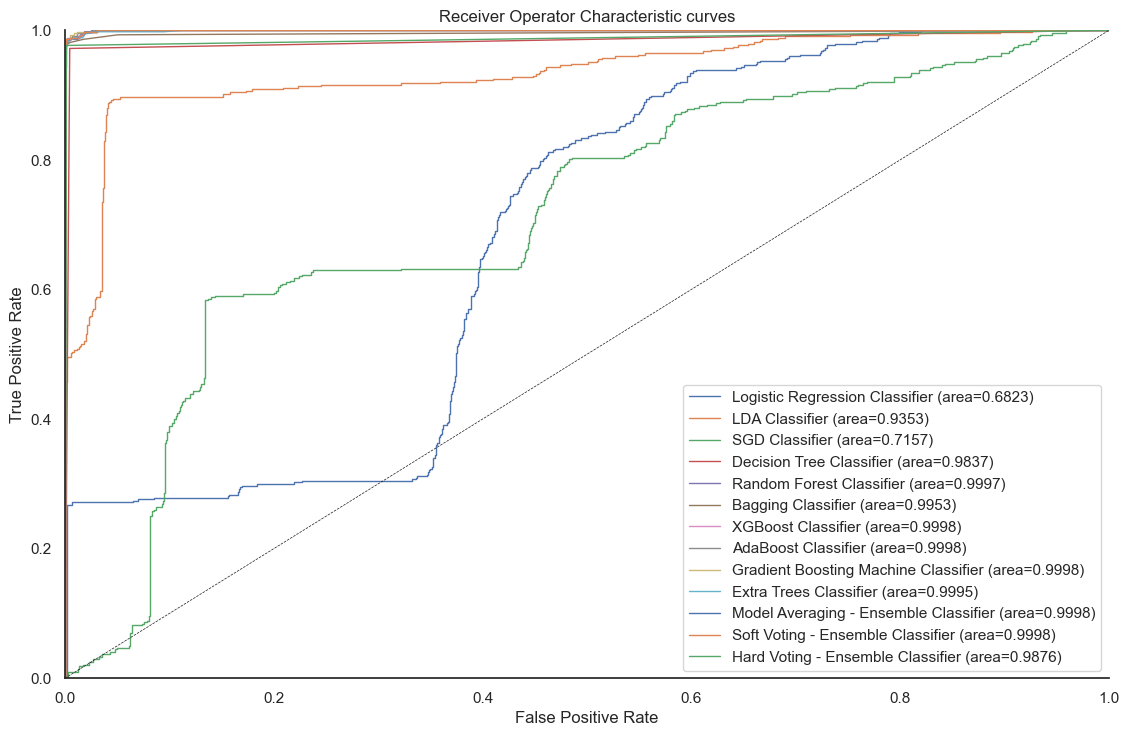

In [83]:
f, ax = plt.subplots(figsize=(12, 8))

roc_auc_plot(y_test, LR.predict_proba(X_test), label='Logistic Regression Classifier', l='-')
roc_auc_plot(y_test, LDA.predict_proba(X_test), label='LDA Classifier', l='-')
roc_auc_plot(y_test, SGD.decision_function(X_test), label='SGD Classifier', l='-')
roc_auc_plot(y_test, DT.predict_proba(X_test), label='Decision Tree Classifier', l='-')
roc_auc_plot(y_test, RF.predict_proba(X_test), label='Random Forest Classifier', l='-')
roc_auc_plot(y_test, BG.predict_proba(X_test), label='Bagging Classifier', l='-')
roc_auc_plot(y_test, XGB.predict_proba(X_test), label='XGBoost Classifier', l='-')
roc_auc_plot(y_test, ADA.predict_proba(X_test), label='AdaBoost Classifier', l='-')
roc_auc_plot(y_test, GBM.predict_proba(X_test), label='Gradient Boosting Machine Classifier', l='-')
roc_auc_plot(y_test, ET.predict_proba(X_test), label='Extra Trees Classifier', l='-')
roc_auc_plot(y_test, ensemble_prob, label='Model Averaging - Ensemble Classifier', l='-')
roc_auc_plot(y_test, soft_ensemble.predict_proba(X_test), label='Soft Voting - Ensemble Classifier', l='-')

hard_voting_pred = hard_ensemble.predict(X_test)
roc_auc_plot(y_test, hard_voting_pred, label='Hard Voting - Ensemble Classifier', l='-')

ax.plot([0, 1], [0, 1], color='k', linewidth=0.5, linestyle='--')
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

As we can see highest average area under the curve (AUC) of 0.950 is attained by Extra Tree Classifier

## Precision Recall curve

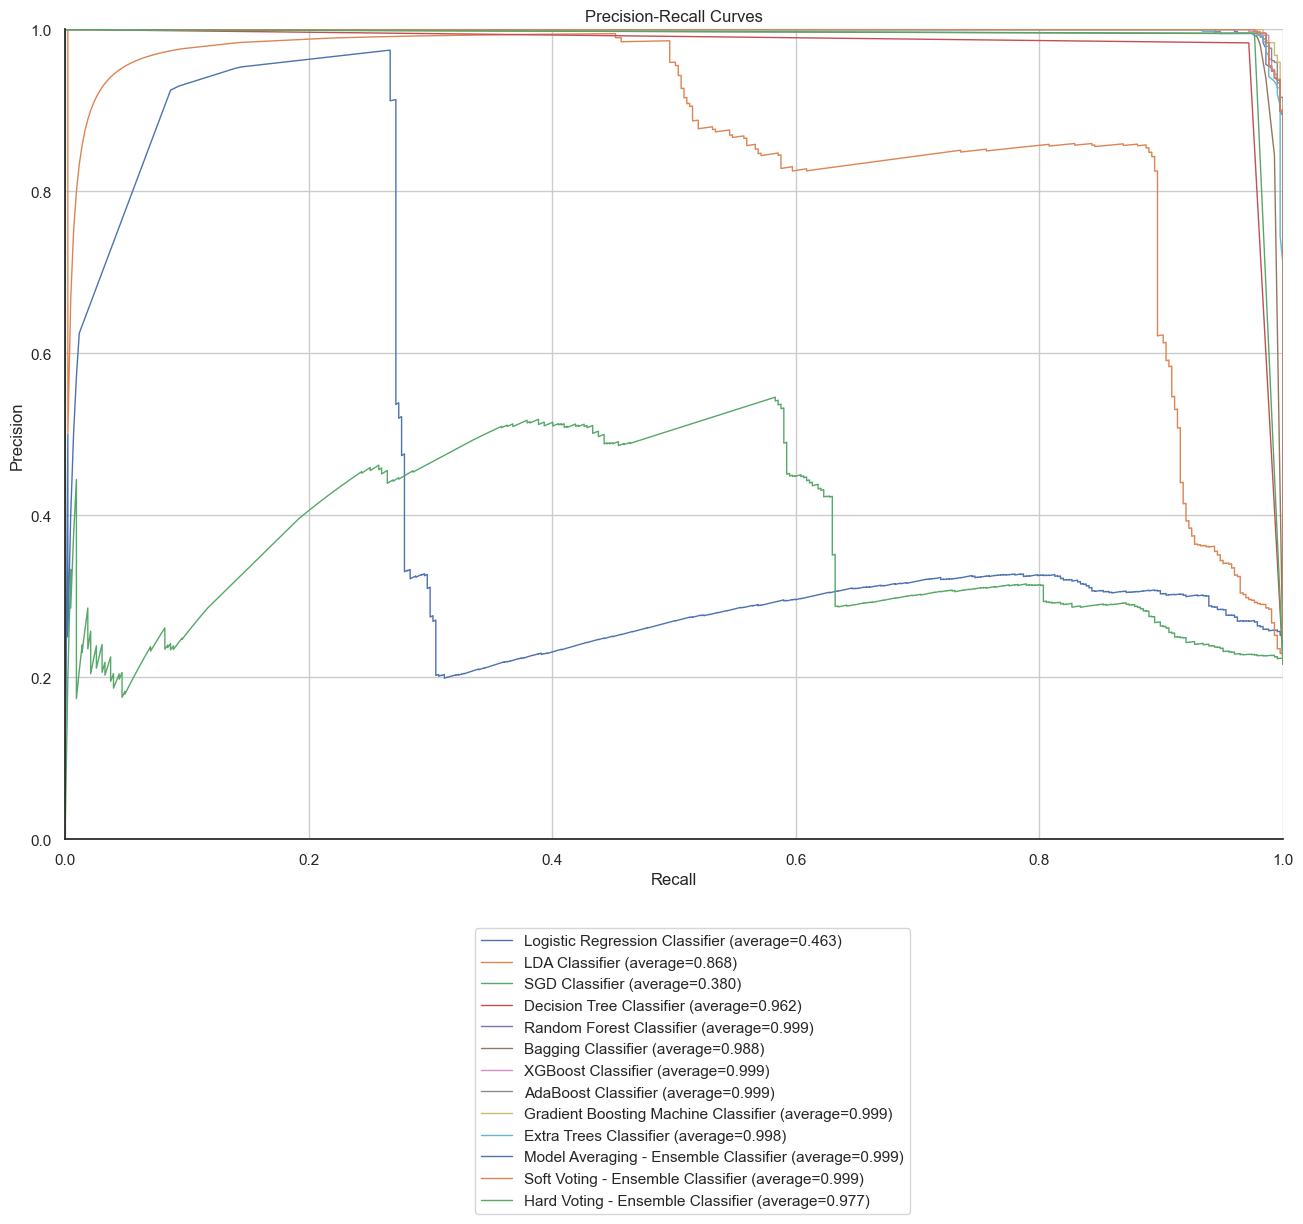

In [93]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    
    if y_proba.ndim > 1 and y_proba.shape[1] > 1:
        precision, recall, _ = precision_recall_curve(y_true, y_proba[:, 1])
        average_precision = average_precision_score(y_true, y_proba[:, 1], average="micro")
    else:
        precision, recall, _ = precision_recall_curve(y_true, y_proba)
        average_precision = average_precision_score(y_true, y_proba, average="micro")
    
    ax.plot(recall, precision, label='%s (average=%.3f)' % (label, average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14, 10))

precision_recall_plot(y_test, LR.predict_proba(X_test), label='Logistic Regression Classifier', l='-')
precision_recall_plot(y_test, LDA.predict_proba(X_test), label='LDA Classifier', l='-')
precision_recall_plot(y_test, SGD.decision_function(X_test), label='SGD Classifier', l='-')
precision_recall_plot(y_test, DT.predict_proba(X_test), label='Decision Tree Classifier', l='-')
precision_recall_plot(y_test, RF.predict_proba(X_test), label='Random Forest Classifier', l='-')
precision_recall_plot(y_test, BG.predict_proba(X_test), label='Bagging Classifier', l='-')
precision_recall_plot(y_test, XGB.predict_proba(X_test), label='XGBoost Classifier', l='-')
precision_recall_plot(y_test, ADA.predict_proba(X_test), label='AdaBoost Classifier', l='-')
precision_recall_plot(y_test, GBM.predict_proba(X_test), label='Gradient Boosting Machine Classifier', l='-')
precision_recall_plot(y_test, ET.predict_proba(X_test), label='Extra Trees Classifier', l='-')
precision_recall_plot(y_test, ensemble_prob, label='Model Averaging - Ensemble Classifier', l='-')
precision_recall_plot(y_test, soft_ensemble.predict_proba(X_test), label='Soft Voting - Ensemble Classifier', l='-')

hard_voting_pred = hard_ensemble.predict(X_test)
precision_recall_plot(y_test, hard_voting_pred, label='Hard Voting - Ensemble Classifier', l='-')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='best', bbox_to_anchor=(0.7, -0.1))
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curves')
sns.despine()


## DL Models